In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = pd.read_csv('your_data.csv')
data.head()

id  HDL  relaxation  Urine protein  hearing(right)  LDL  dental caries  \
0   0   40          87              1               1   75              0   
1   1   57          83              1               2  126              1   
2   2   45          75              1               1   93              0   
3   3   38          88              1               1  102              1   
4   4   44          76              1               1   93              0   

   hearing(left)  weight(kg)  eyesight(right)  waist(cm)  smoking  
0              1          60              0.6       81.0        1  
1              2          65              0.7       89.0        0  
2              1          75              0.5       81.0        1  
3              1          95              1.2      105.0        0  
4              1          60              1.0       80.5        1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               159256 non-null  int64  
 1   HDL              159256 non-null  int64  
 2   relaxation       159256 non-null  int64  
 3   Urine protein    159256 non-null  int64  
 4   hearing(right)   159256 non-null  int64  
 5   LDL              159256 non-null  int64  
 6   dental caries    159256 non-null  int64  
 7   hearing(left)    159256 non-null  int64  
 8   weight(kg)       159256 non-null  int64  
 9   eyesight(right)  159256 non-null  float64
 10  waist(cm)        159256 non-null  float64
 11  smoking          159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB


In [8]:
data.isna().sum()

id                 0
HDL                0
relaxation         0
Urine protein      0
hearing(right)     0
LDL                0
dental caries      0
hearing(left)      0
weight(kg)         0
eyesight(right)    0
waist(cm)          0
smoking            0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

id            HDL     relaxation  Urine protein  \
count  159256.000000  159256.000000  159256.000000  159256.000000   
mean    79627.500000      55.852684      76.874071       1.074233   
std     45973.391572      13.964141       8.994642       0.347856   
min         0.000000       9.000000      44.000000       1.000000   
25%     39813.750000      45.000000      70.000000       1.000000   
50%     79627.500000      54.000000      78.000000       1.000000   
75%    119441.250000      64.000000      82.000000       1.000000   
max    159255.000000     136.000000     133.000000       6.000000   

       hearing(right)            LDL  dental caries  hearing(left)  \
count   159256.000000  159256.000000  159256.000000  159256.000000   
mean         1.023421     114.607682       0.197996       1.023974   
std          0.151238      28.158931       0.398490       0.152969   
min          1.000000       1.000000       0.000000       1.000000   
25%          1.000000      95.000000       0.000000       1.000000   
50%          1.000000     114.000000       0.000000       1.000000   
75%          1.000000     133.000000       0.000000       1.000000   
max          2.000000    1860.000000       1.000000       2.000000   

          weight(kg)  eyesight(right)      waist(cm)        smoking  
count  159256.000000    159256.000000  159256.000000  159256.000000  
mean       67.143662         1.000989      83.001990       0.437365  
std        12.586198         0.392299       8.957937       0.496063  
min        30.000000         0.100000      51.000000       0.000000  
25%        60.000000         0.800000      77.000000       0.000000  
50%        65.000000         1.000000      83.000000       0.000000  
75%        75.000000         1.200000      89.000000       1.000000  
max       130.000000         9.900000     127.000000       1.000000

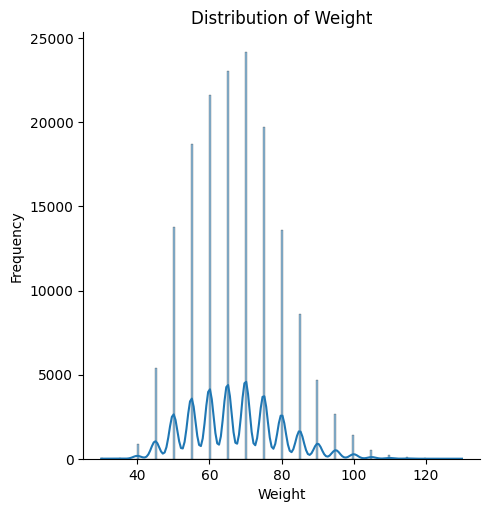

In [15]:
sns.displot(data['weight(kg)'], kde=True)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

<Figure size 1500x1000 with 0 Axes>

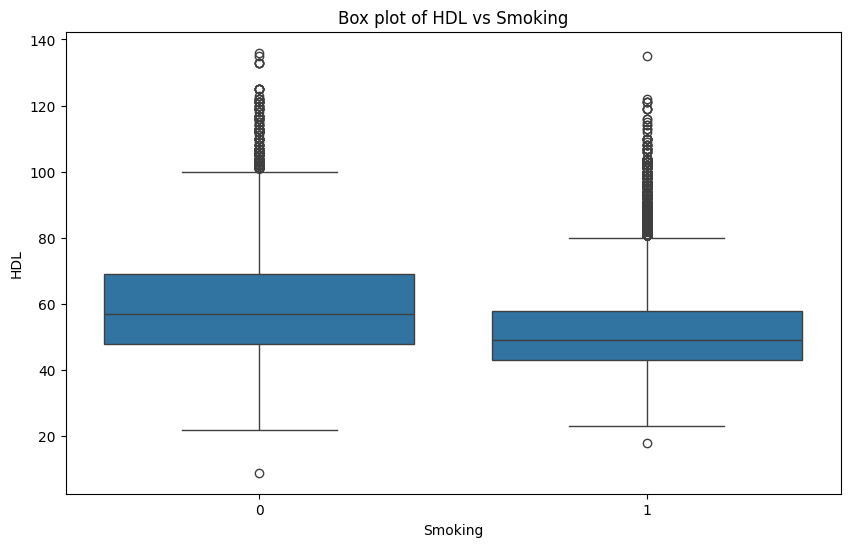

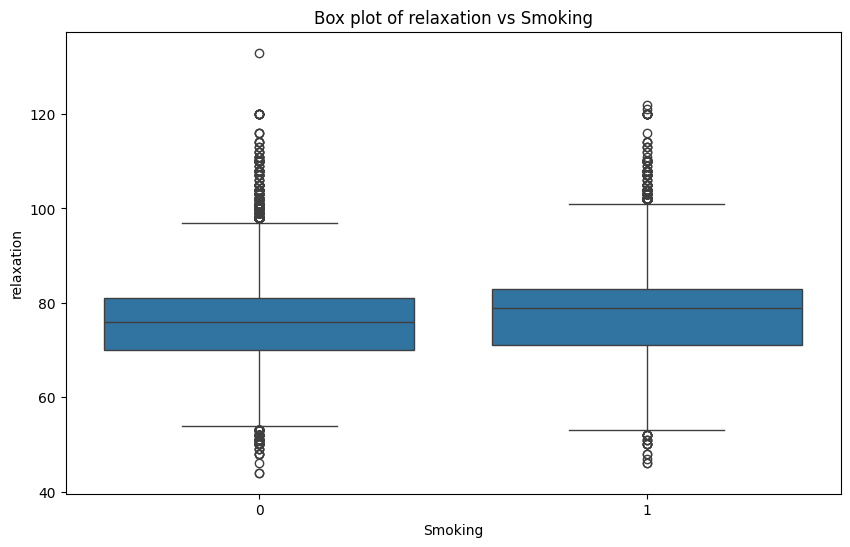

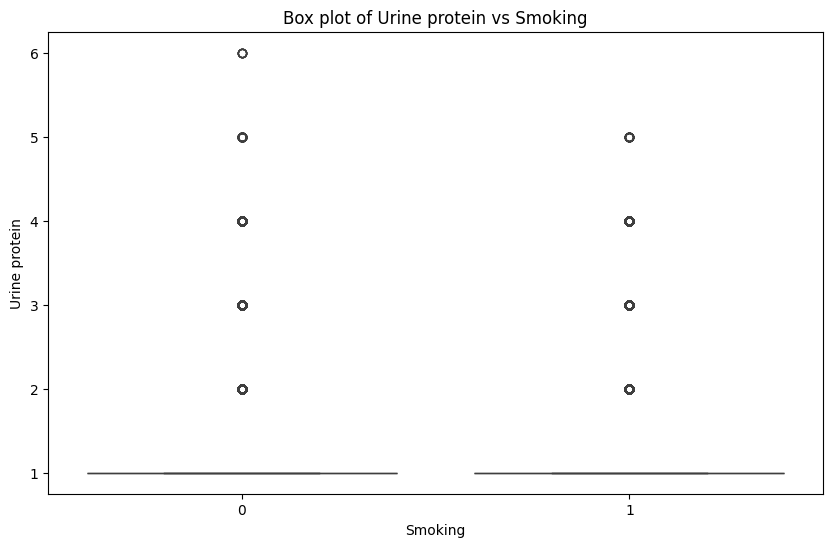

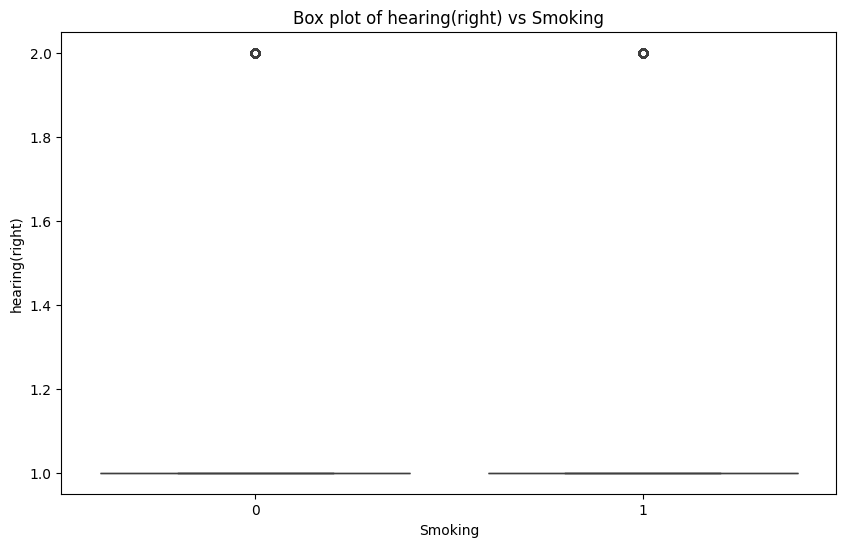

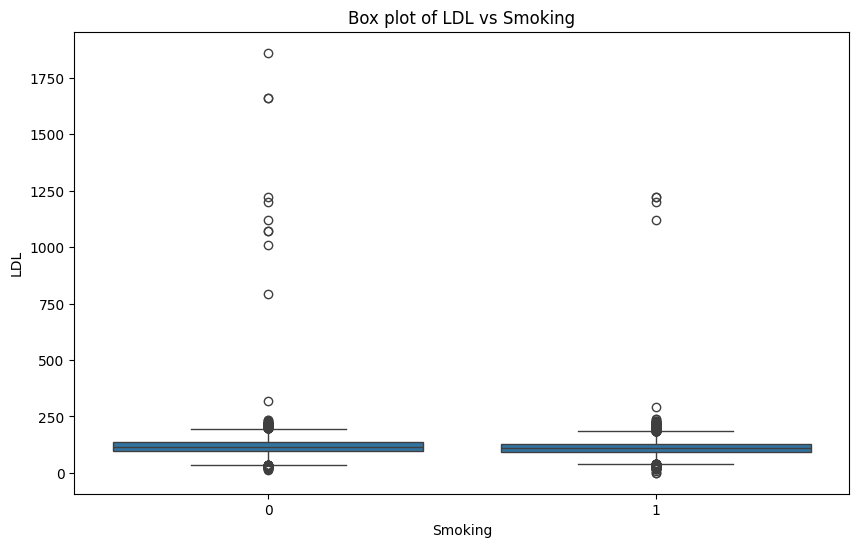

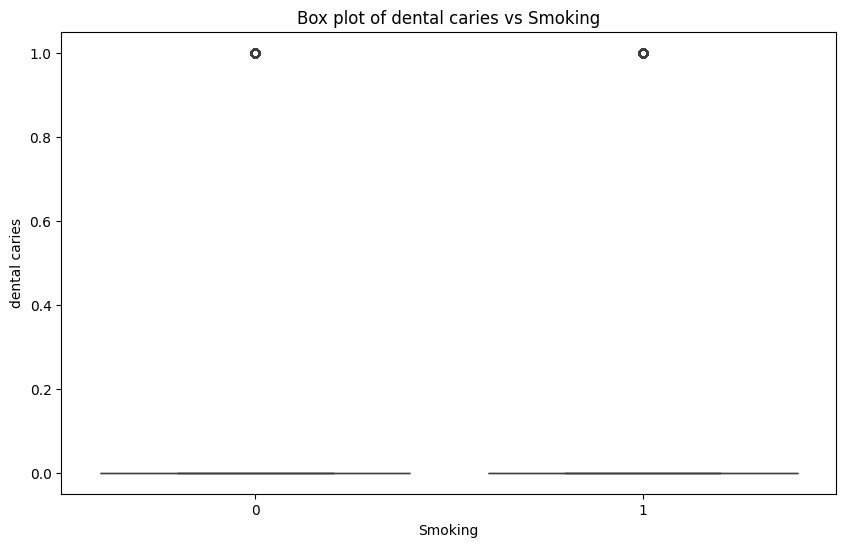

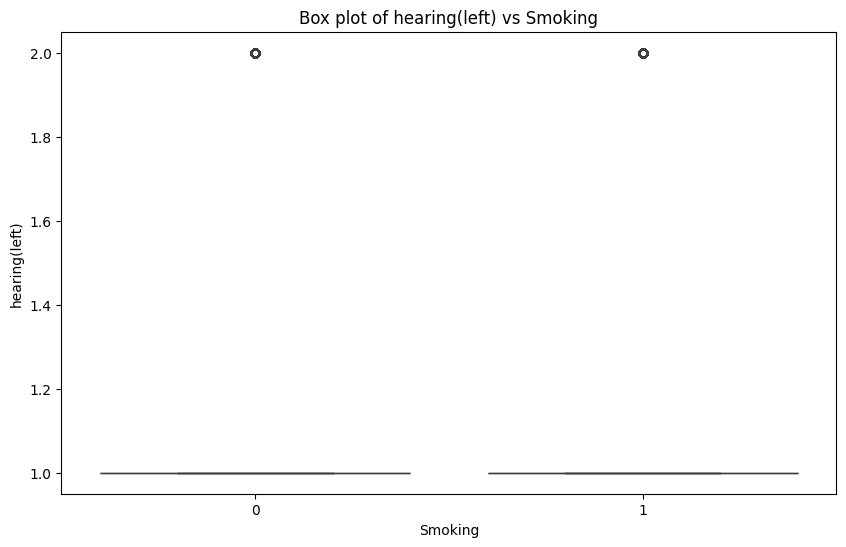

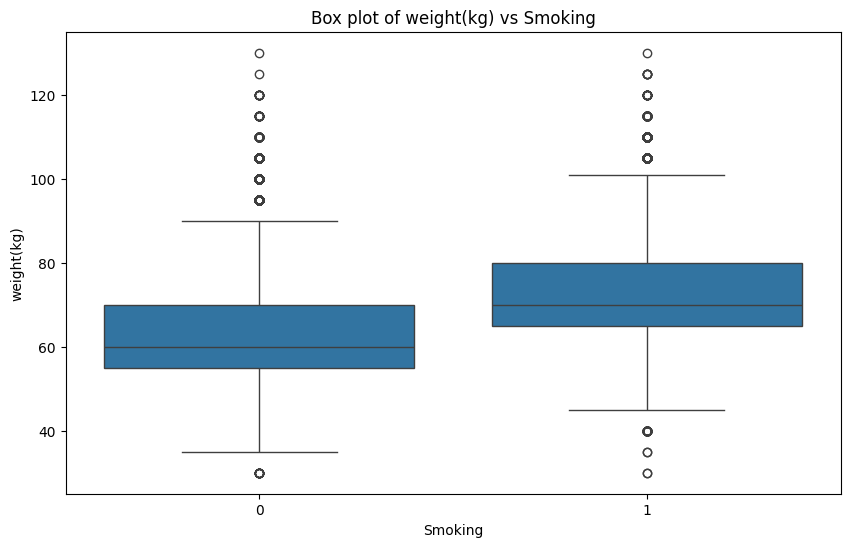

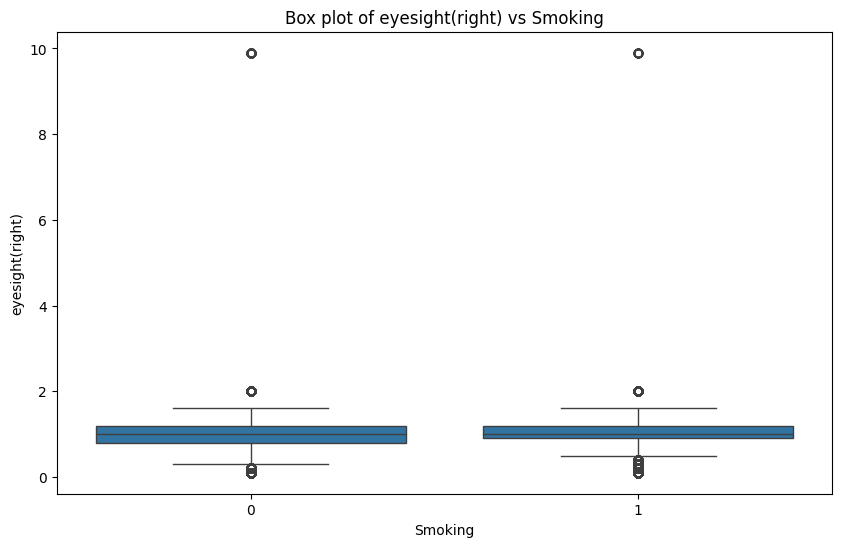

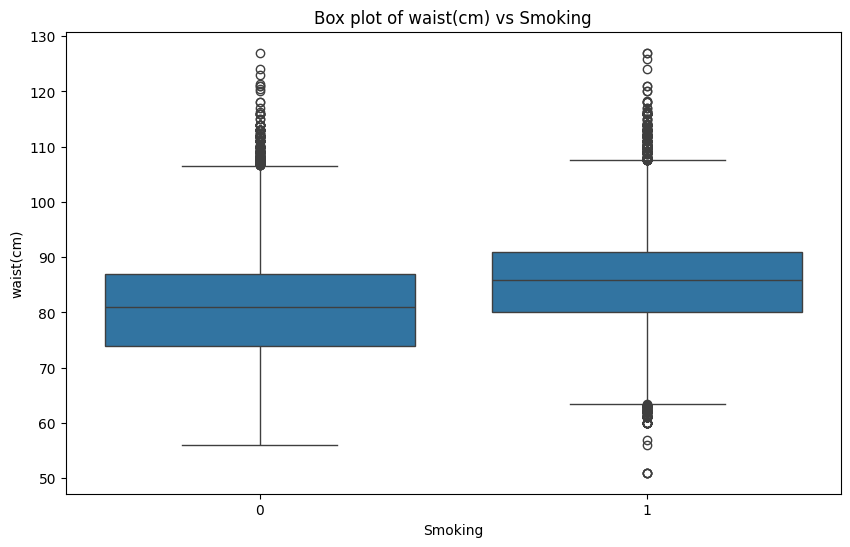

In [19]:
plt.figure(figsize=(15, 10))
for column in data.columns[1:-1]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='smoking', y=column, data=data)
    plt.title(f'Box plot of {column} vs Smoking')
    plt.xlabel('Smoking')
    plt.ylabel(column)
    plt.show()

In [22]:
data['Urine protein'].value_counts()

Urine protein
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: count, dtype: int64

In [23]:
data['dental caries'].value_counts()

dental caries
0    127724
1     31532
Name: count, dtype: int64

In [24]:
data['hearing(left)'].value_counts()

hearing(left)
1    155438
2      3818
Name: count, dtype: int64

In [25]:
data['hearing(right)'].value_counts()

hearing(right)
1    155526
2      3730
Name: count, dtype: int64

In [ ]:
data['']

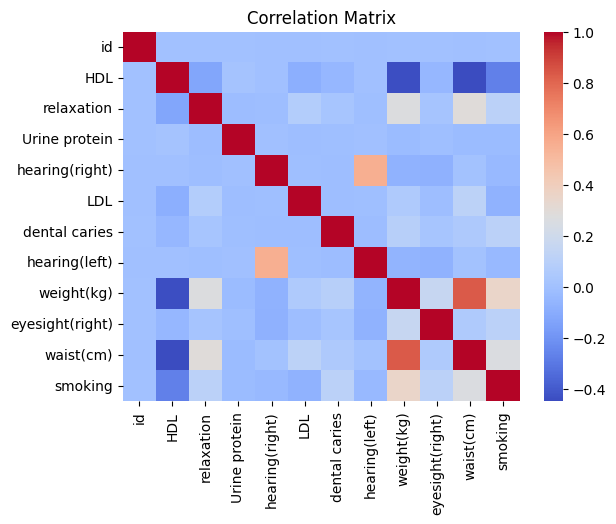

In [42]:
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

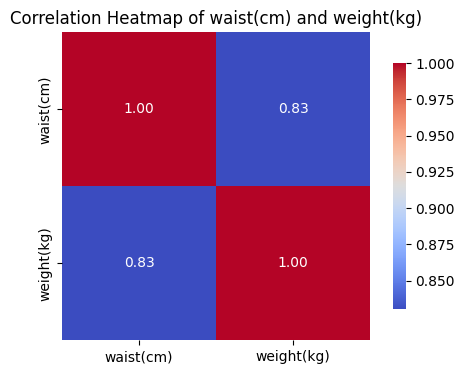

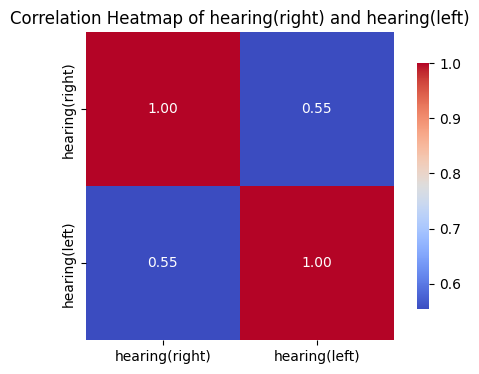

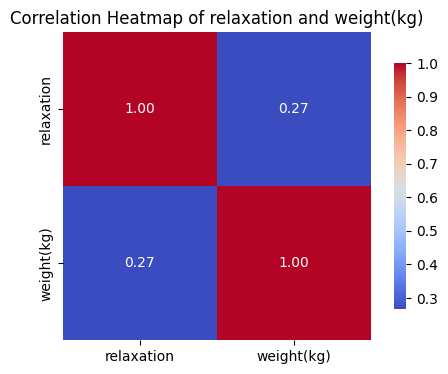

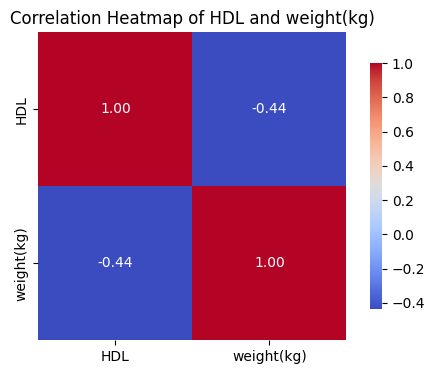

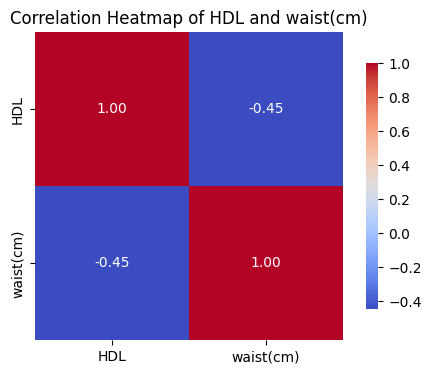

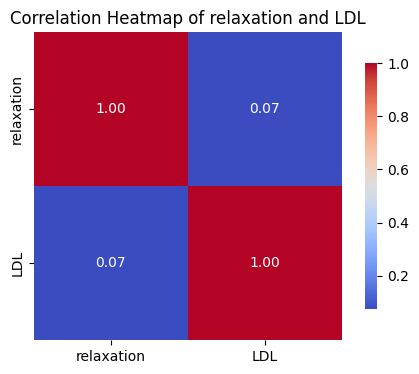

In [63]:
column_pairs = [('waist(cm)', 'weight(kg)'), ('hearing(right)', 'hearing(left)'), ('relaxation', 'weight(kg)'), ('HDL','weight(kg)'),('HDL', 'waist(cm)'),('relaxation','LDL')]

for column1, column2 in column_pairs:
    correlation_matrix = data[[column1, column2]].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title(f'Correlation Heatmap of {column1} and {column2}')
    plt.show()

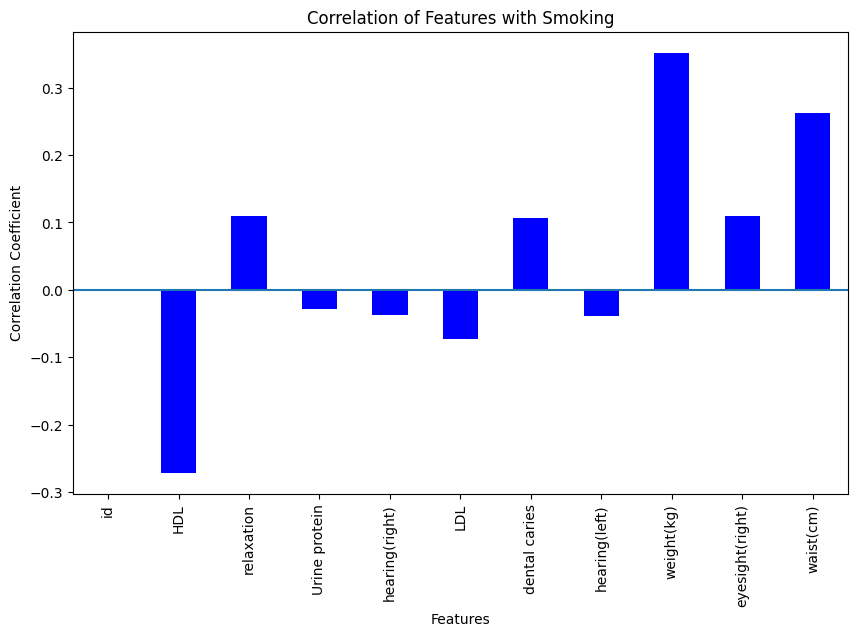

In [38]:
correlation_with_target = data.corr()['smoking'].drop('smoking')
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='blue')
plt.title('Correlation of Features with Smoking')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline()
plt.show()

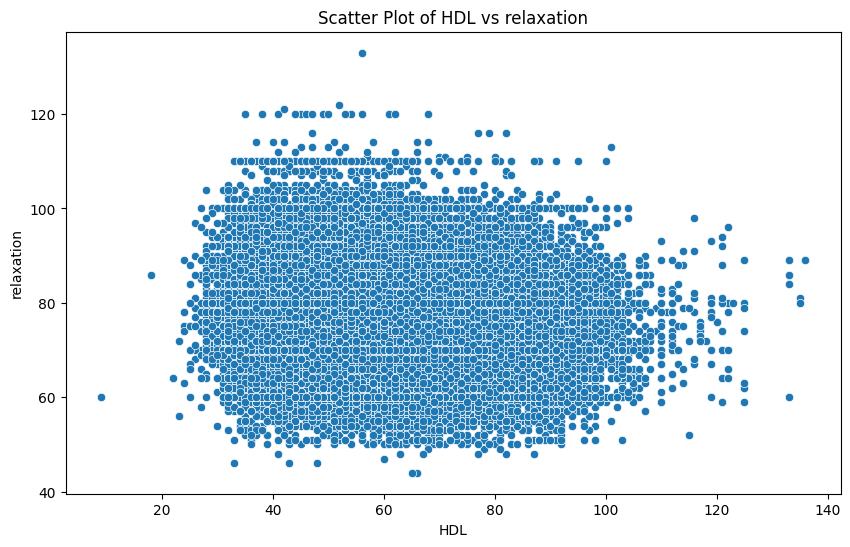

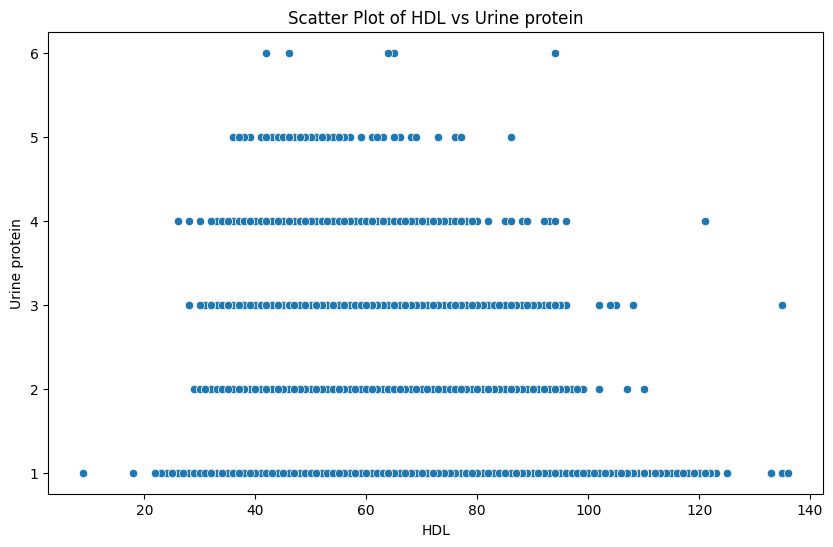

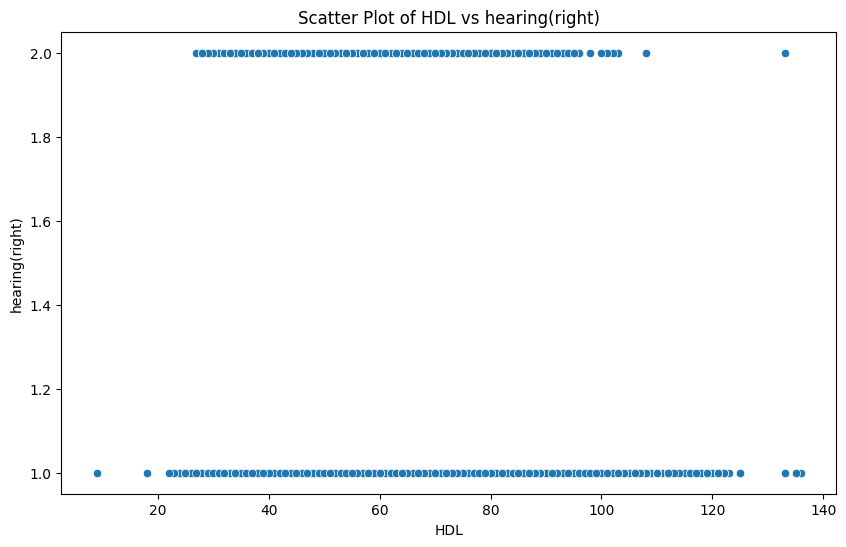

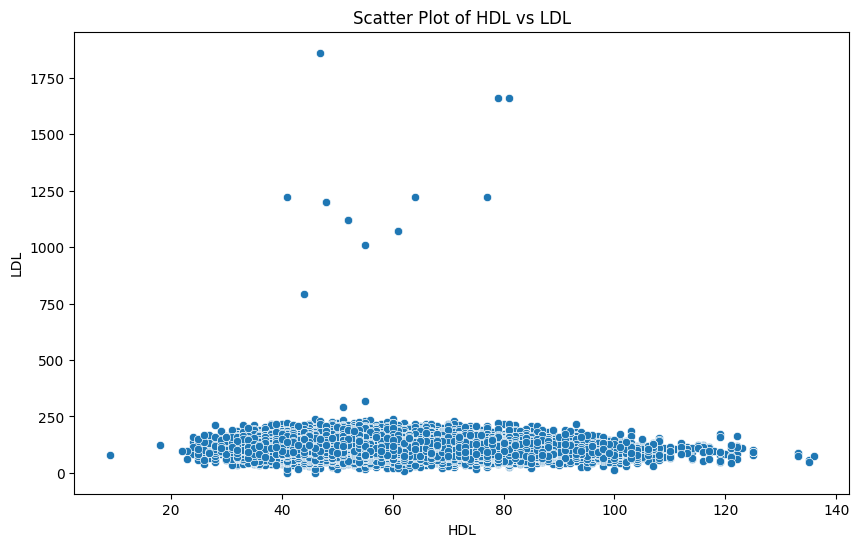

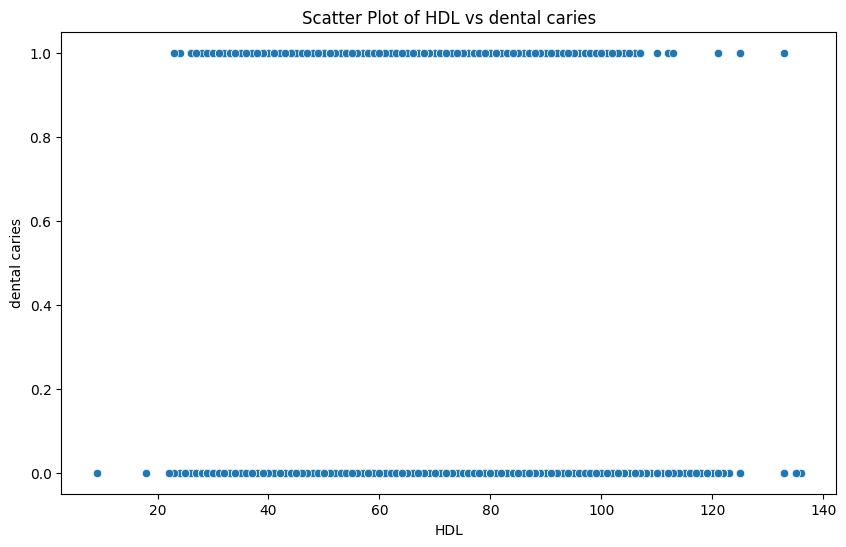

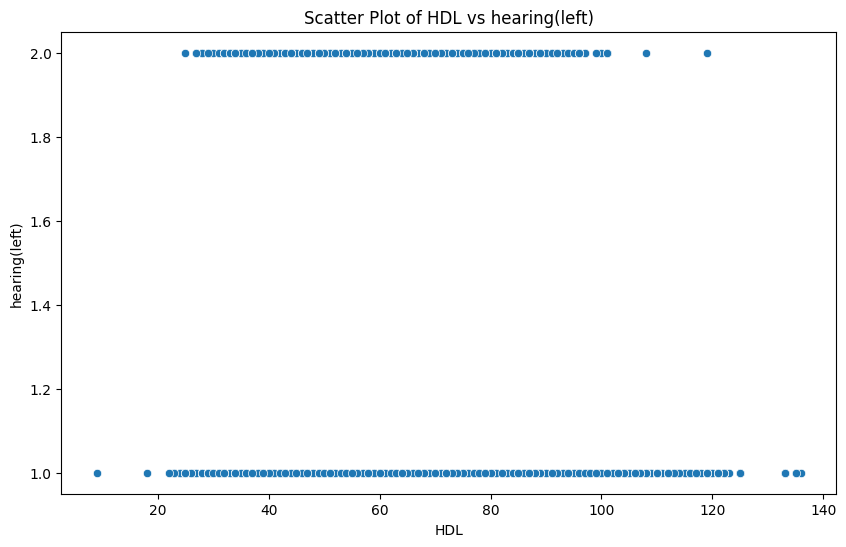

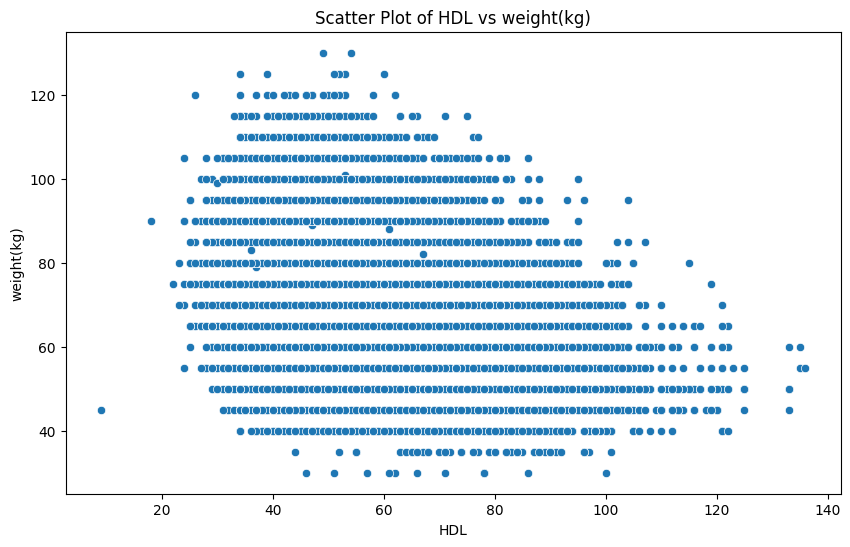

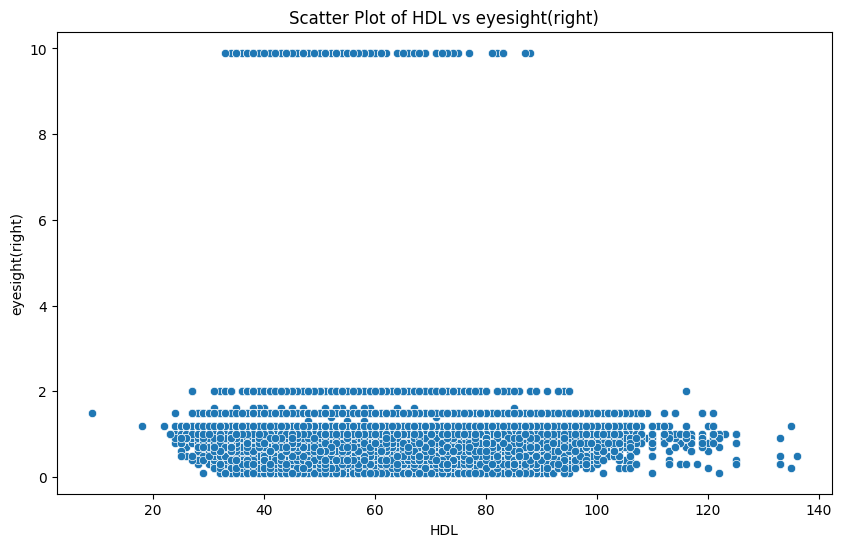

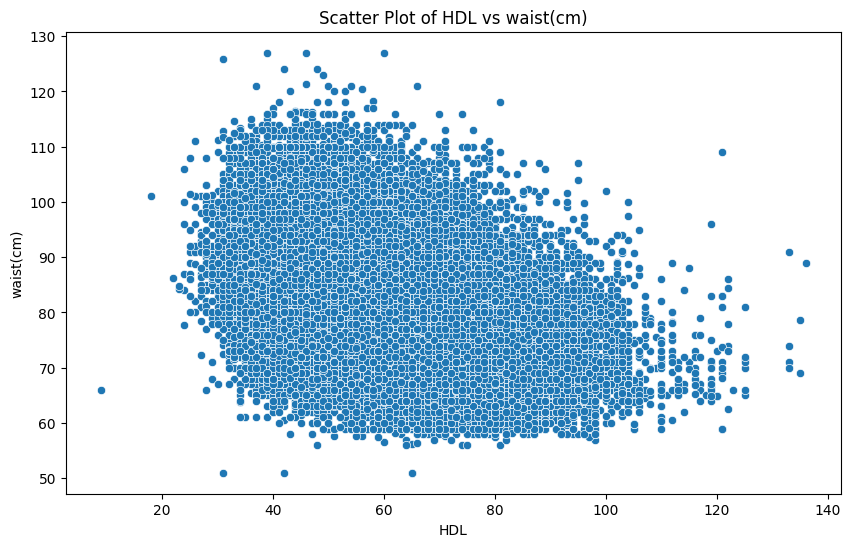

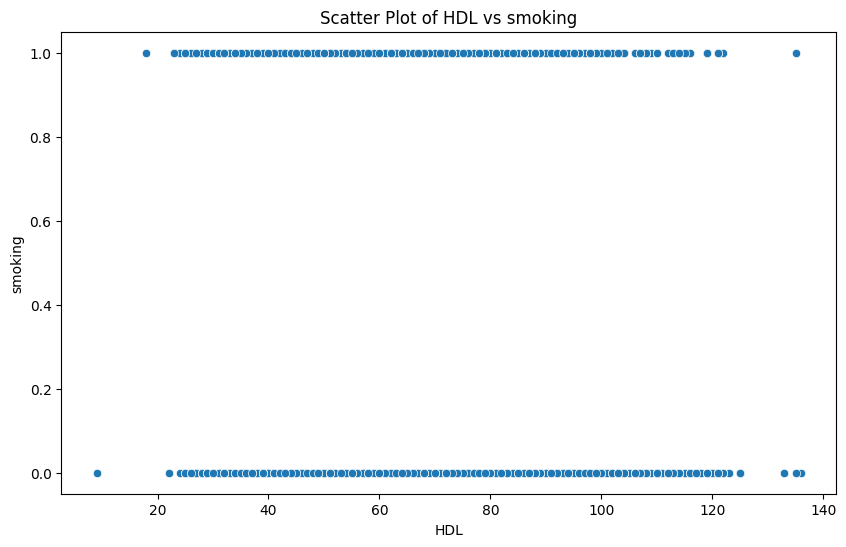

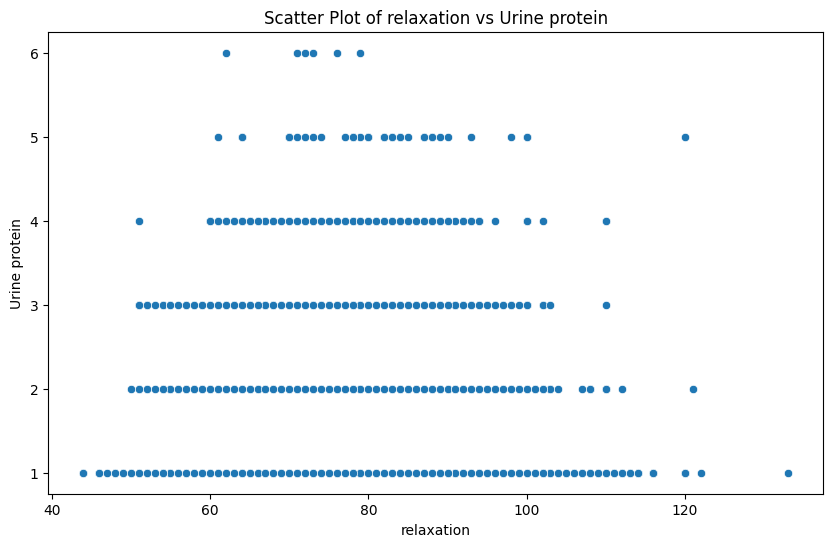

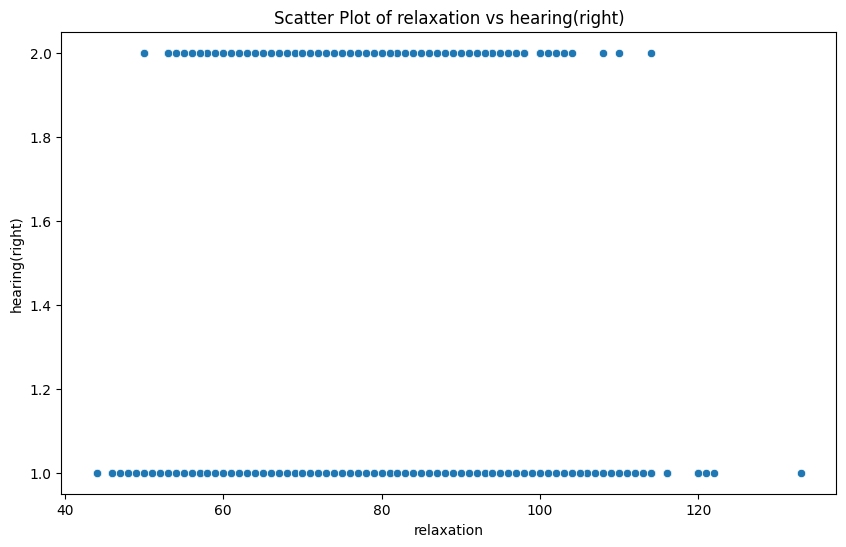

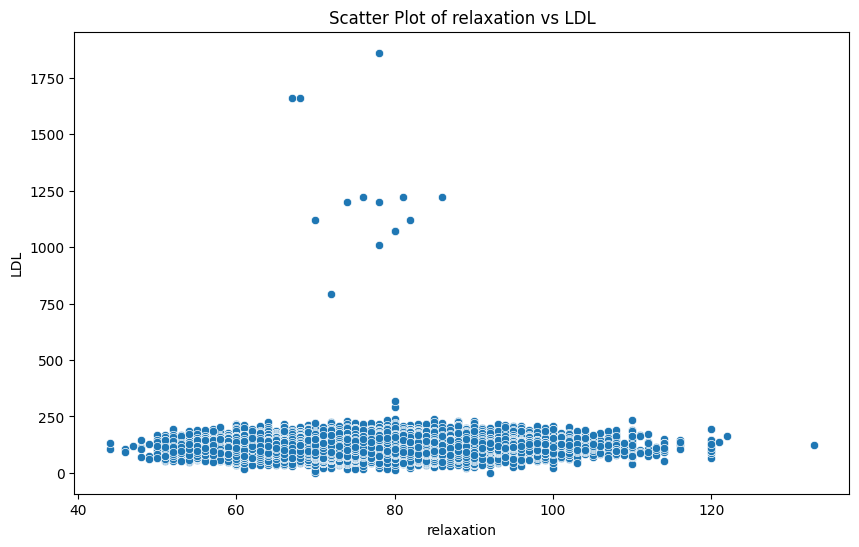

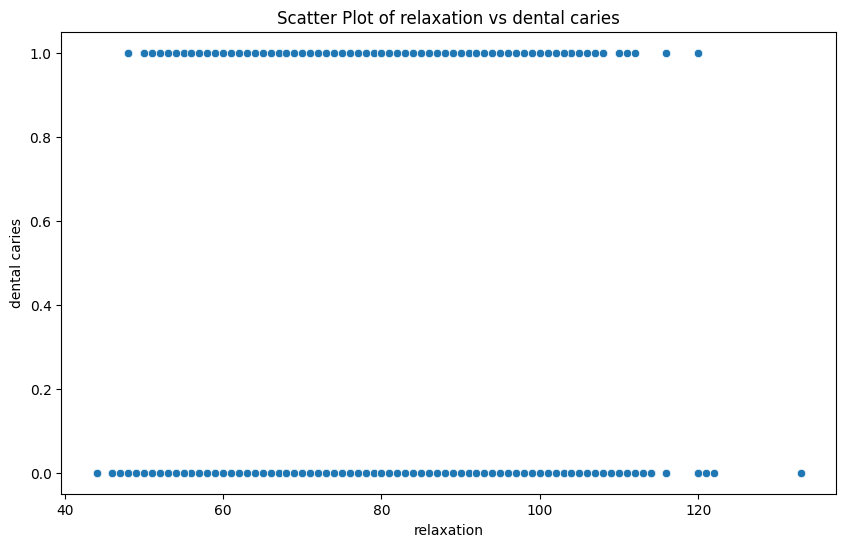

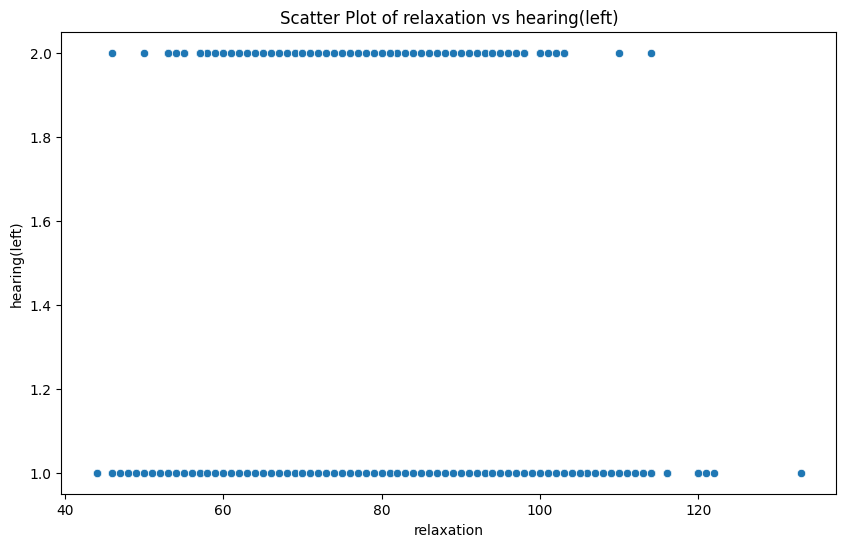

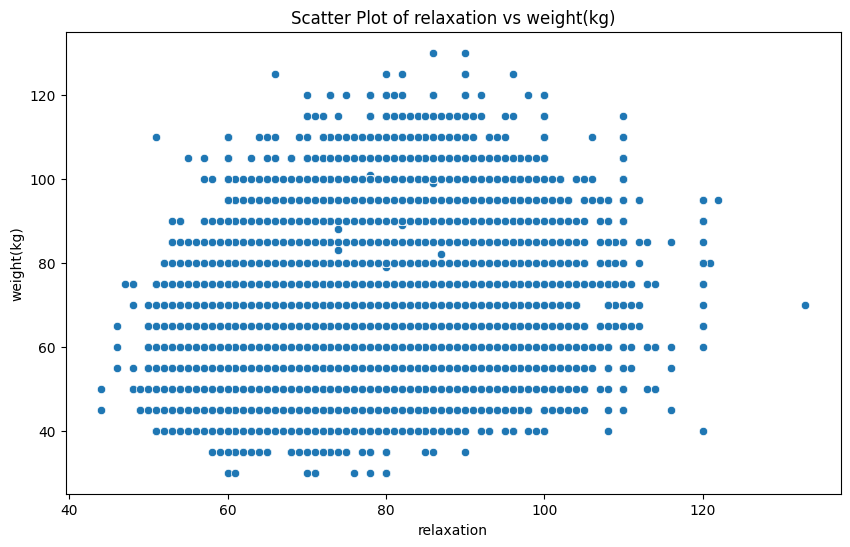

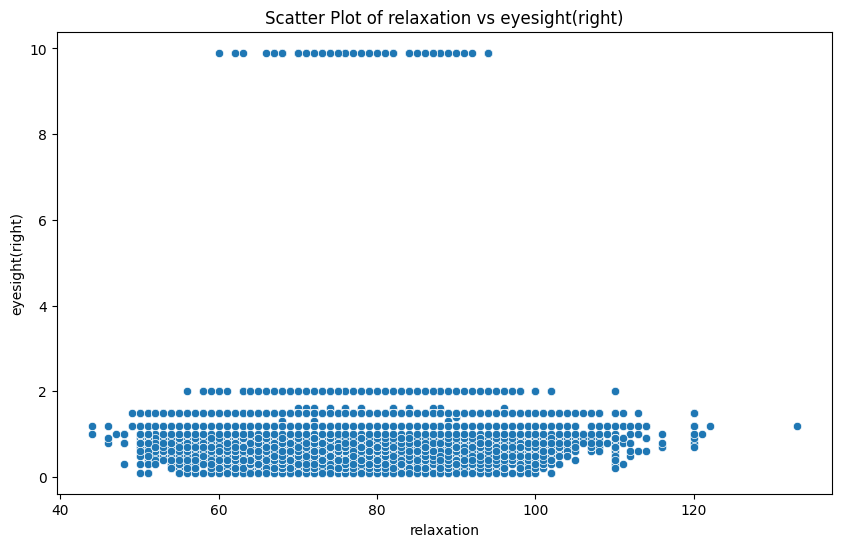

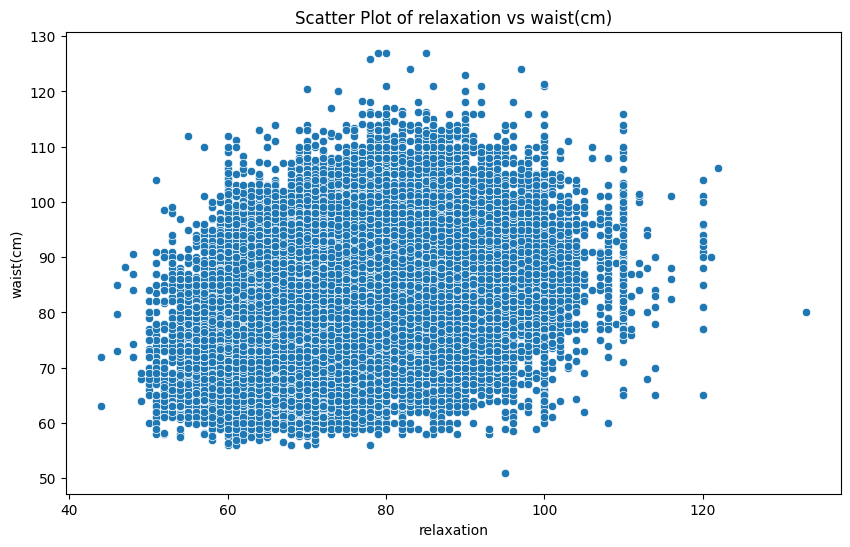

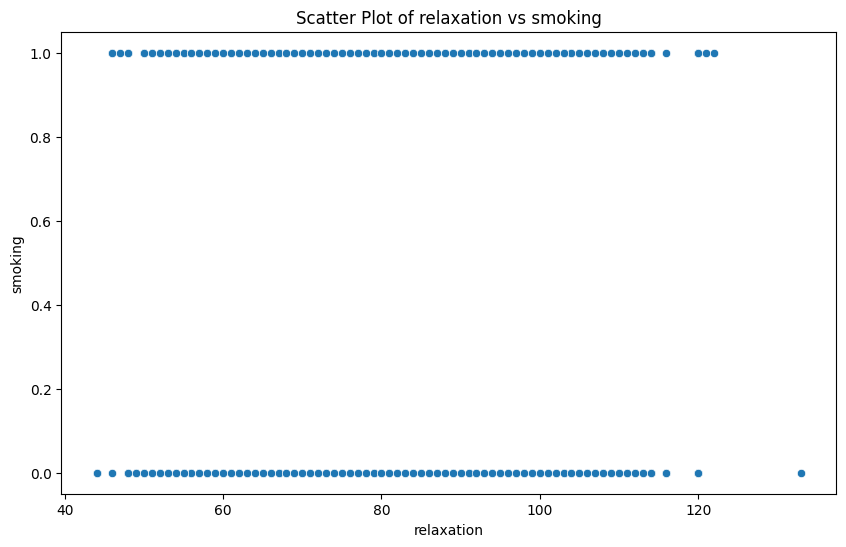

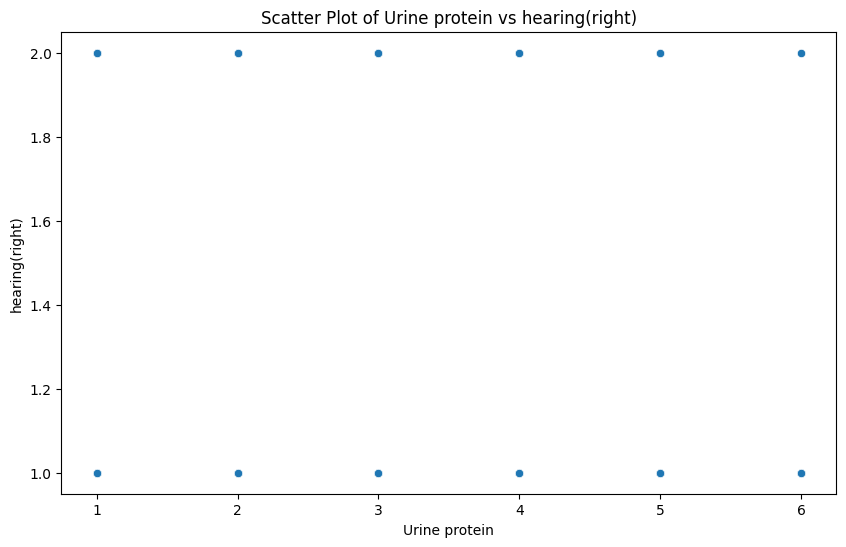

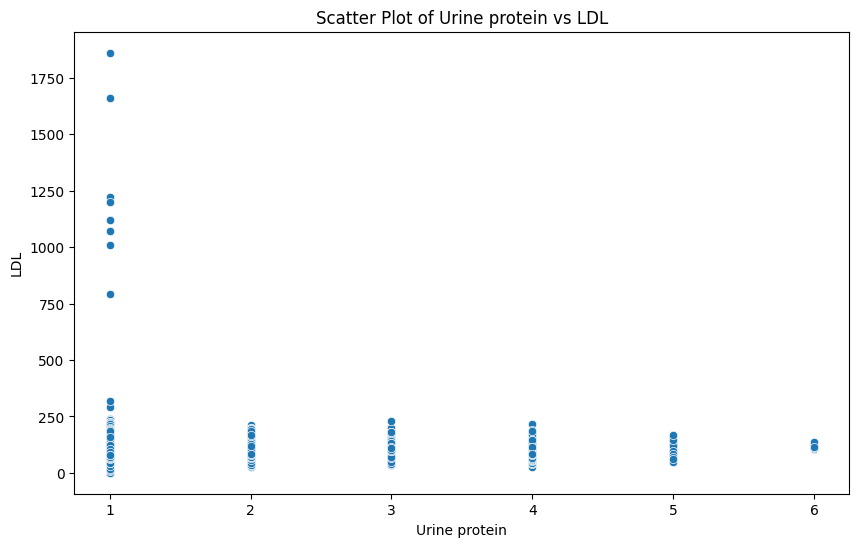

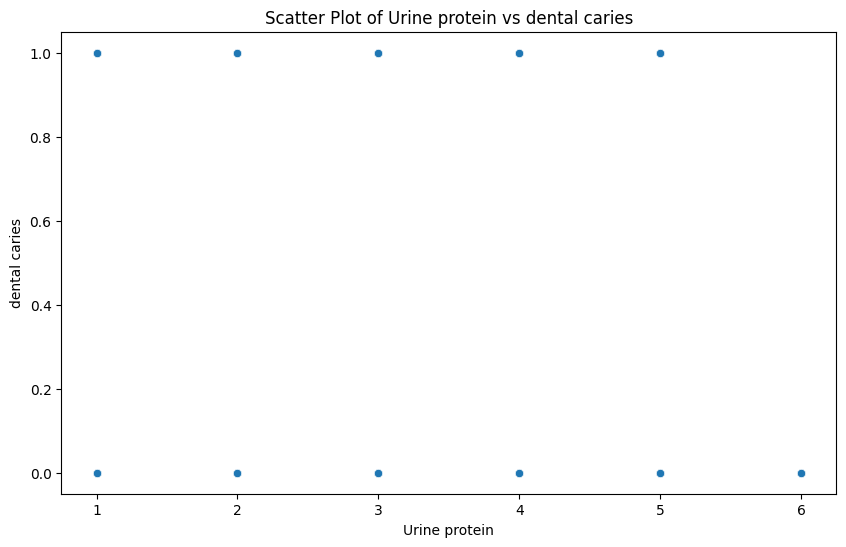

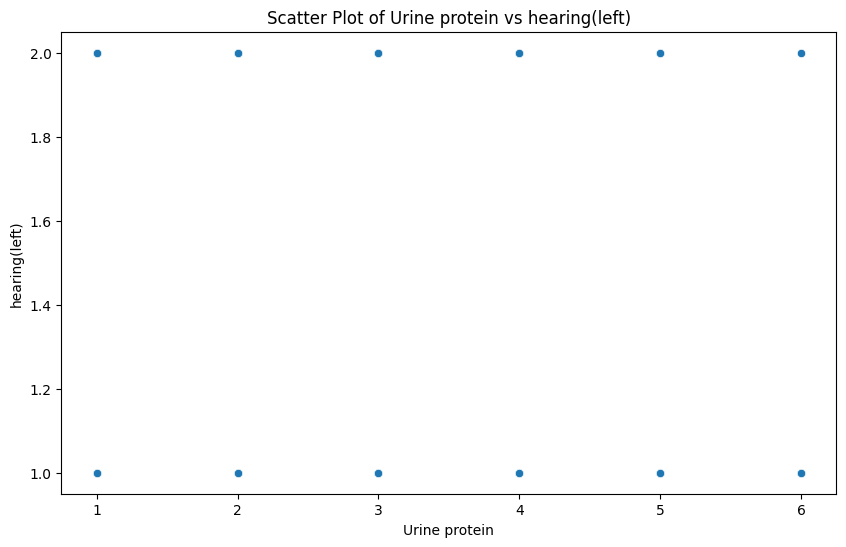

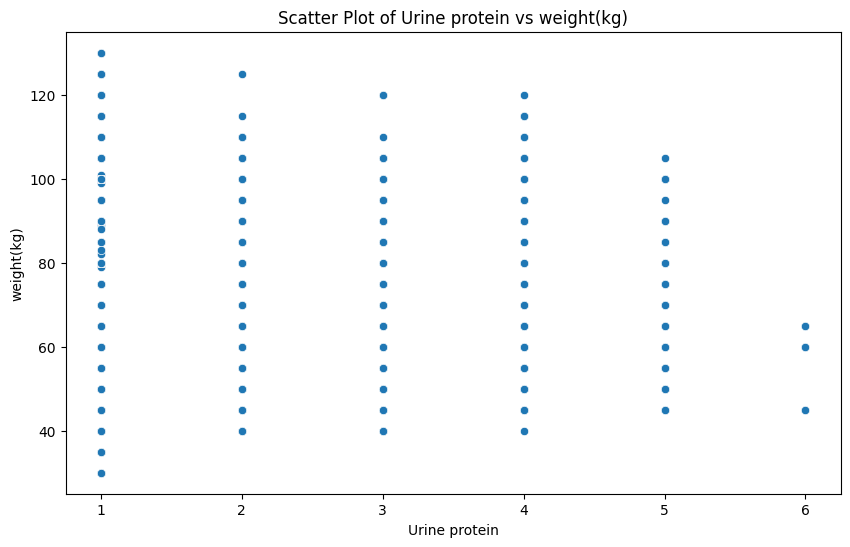

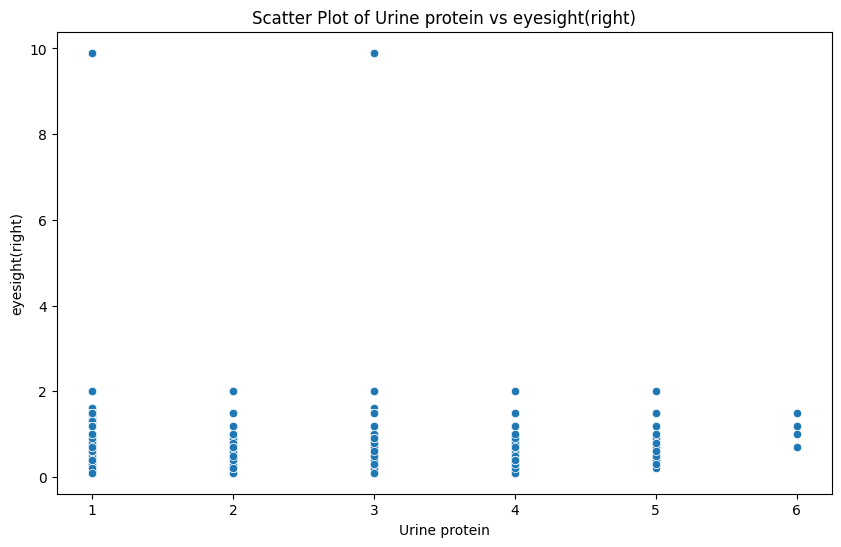

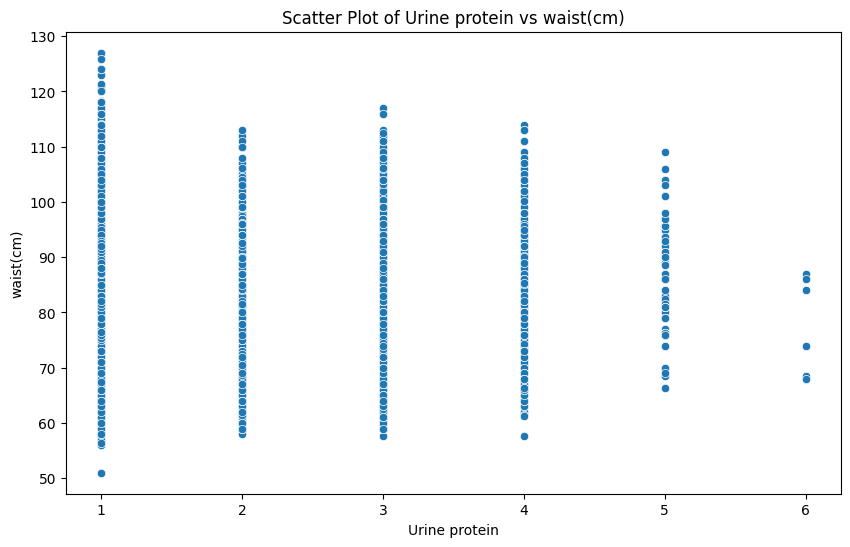

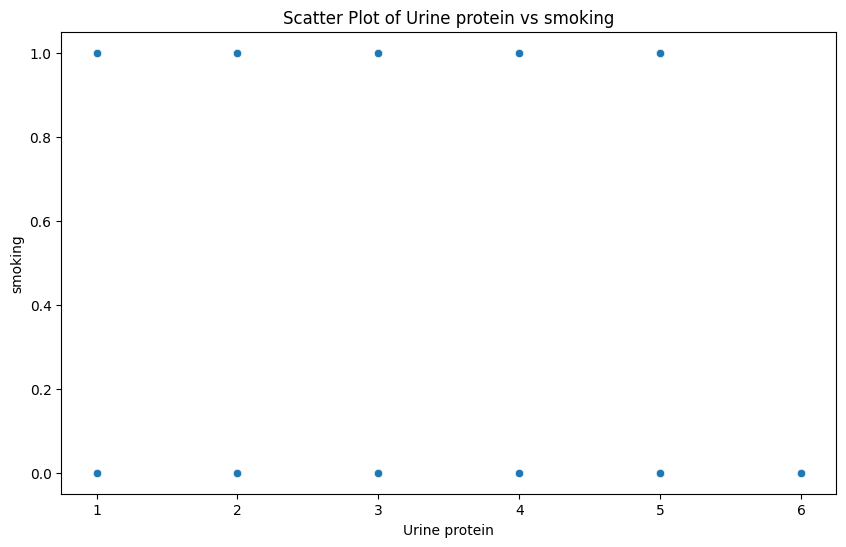

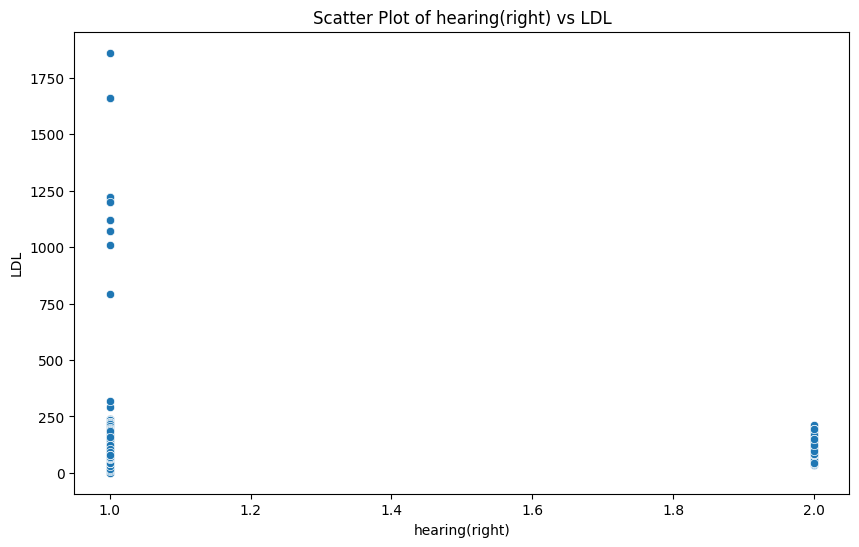

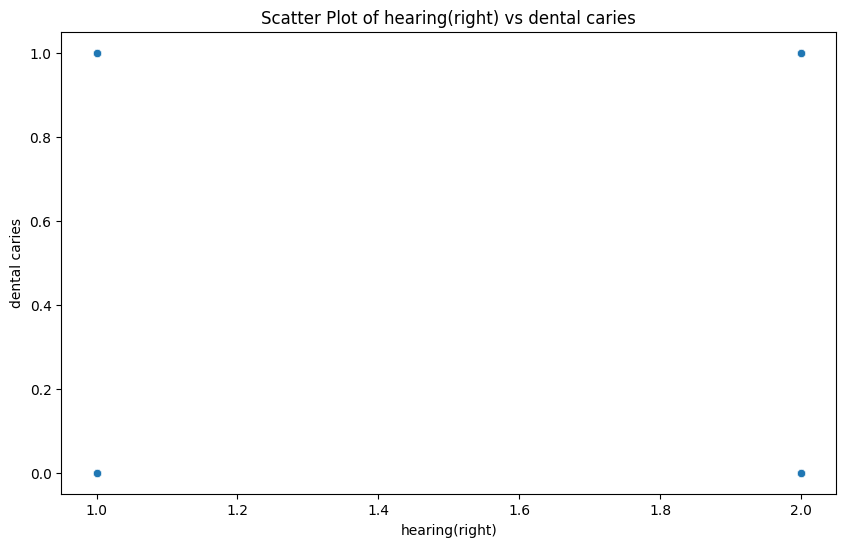

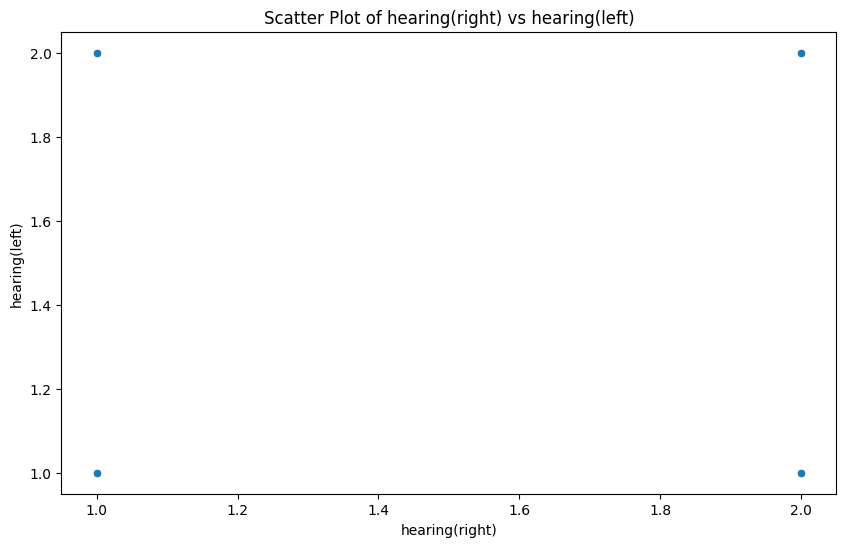

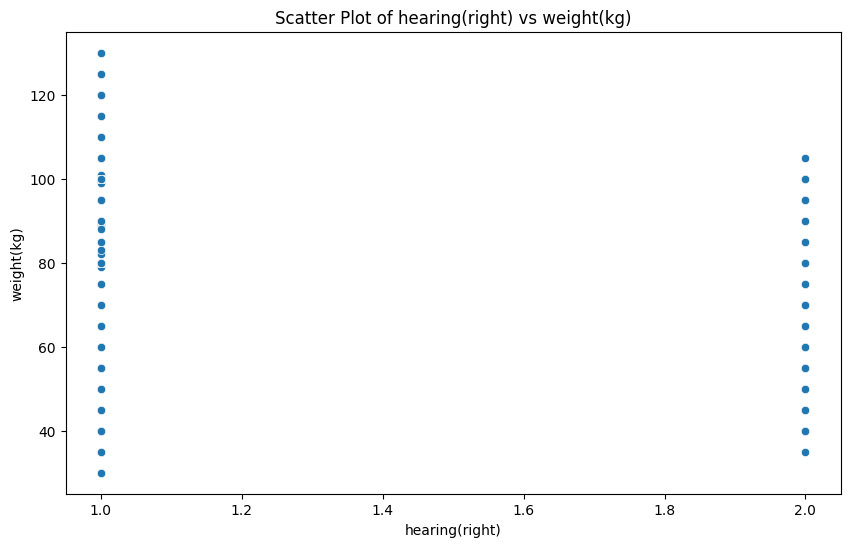

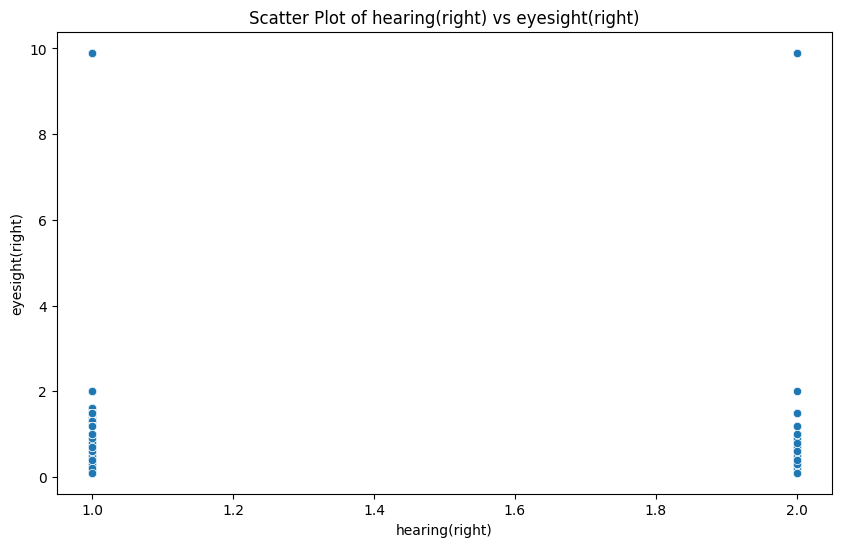

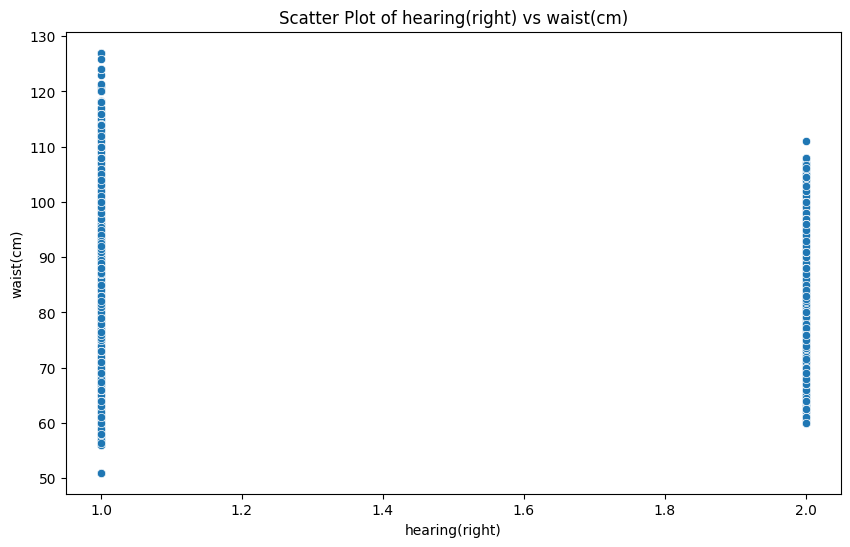

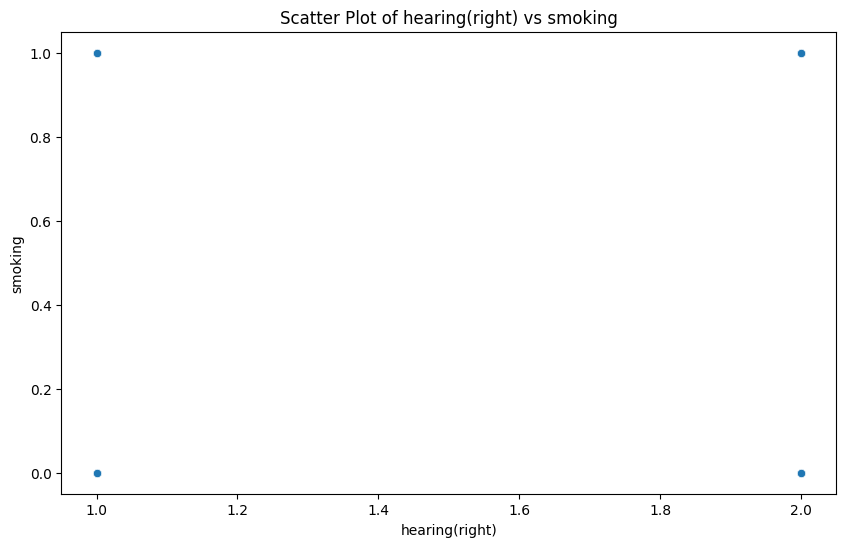

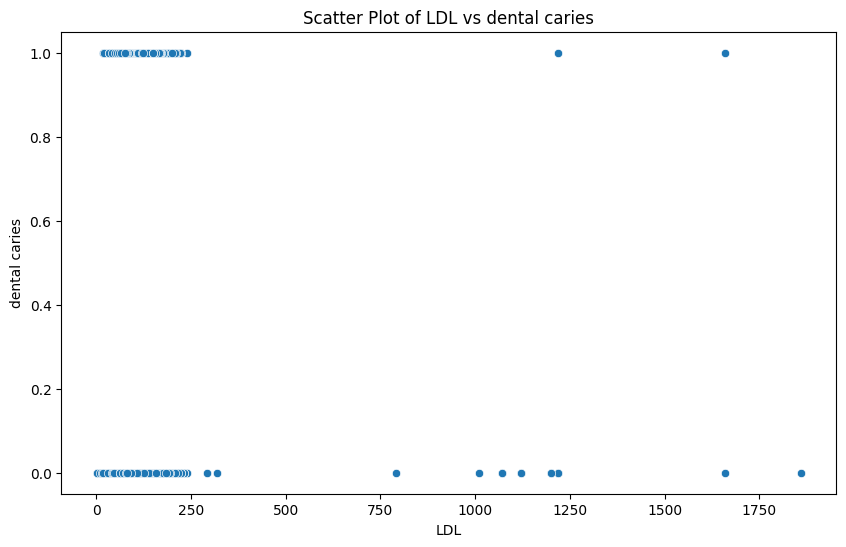

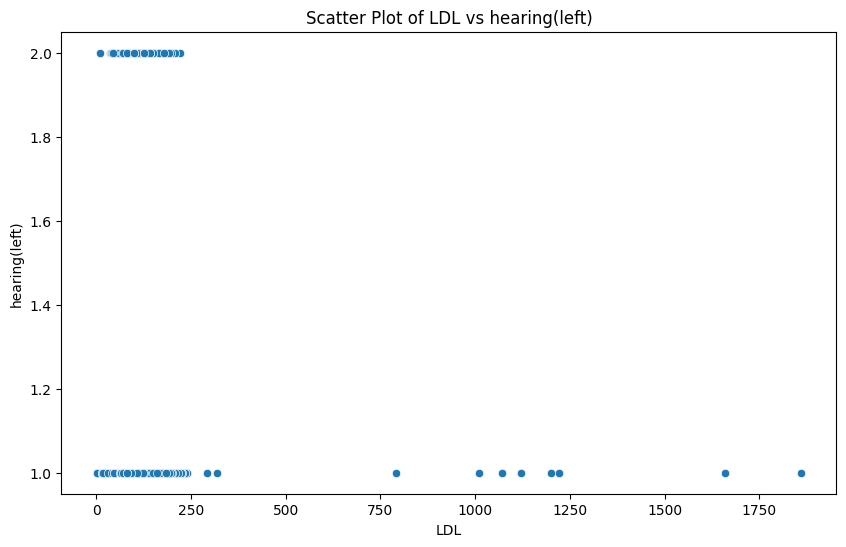

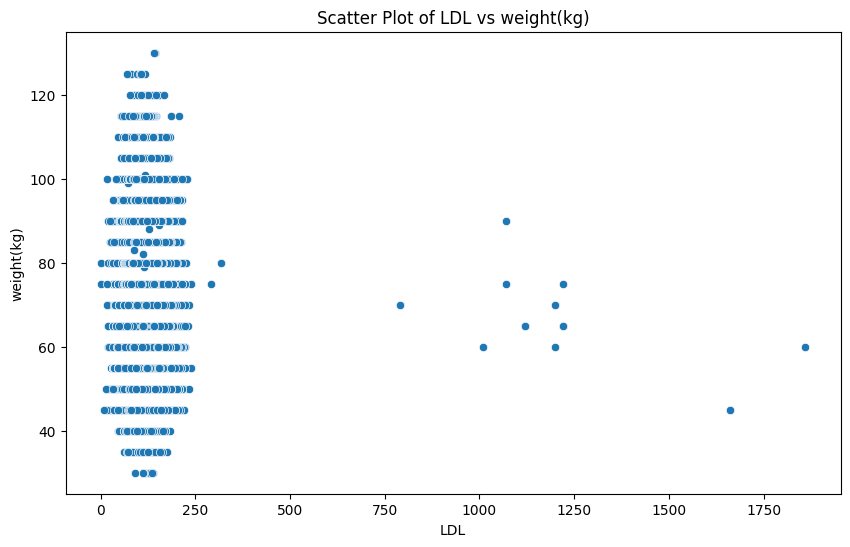

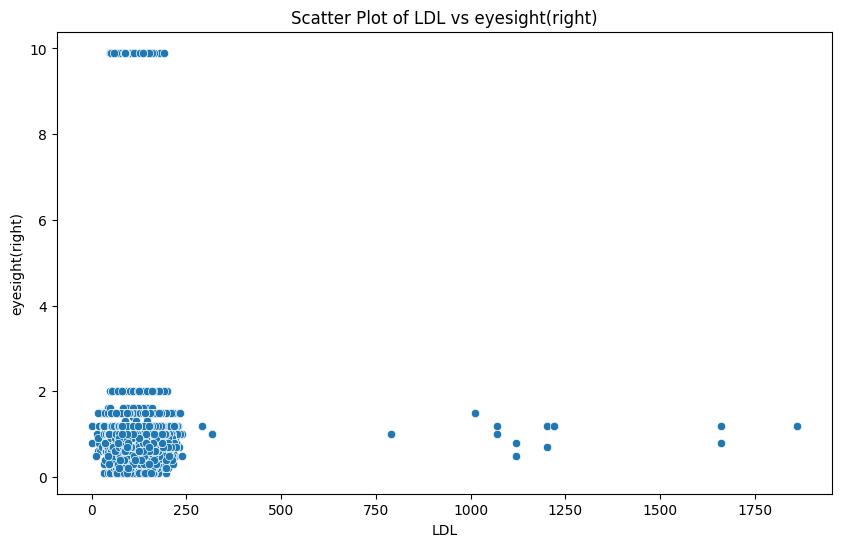

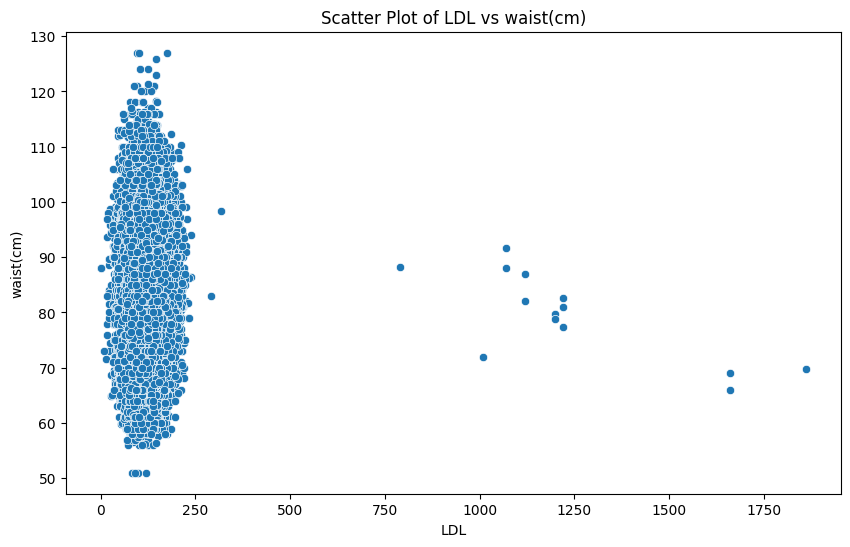

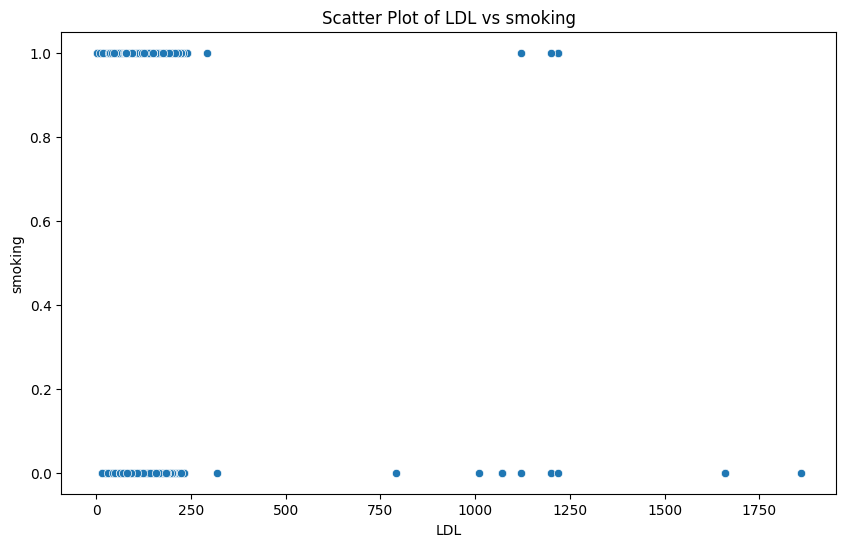

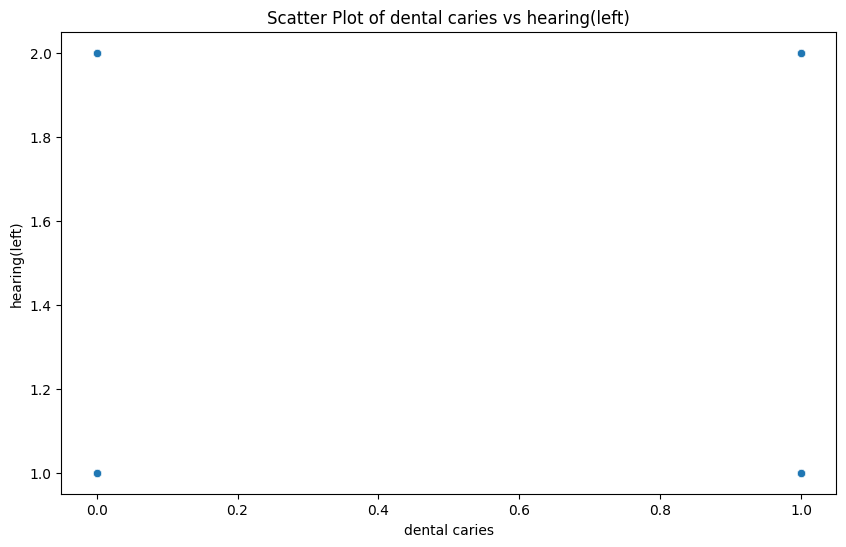

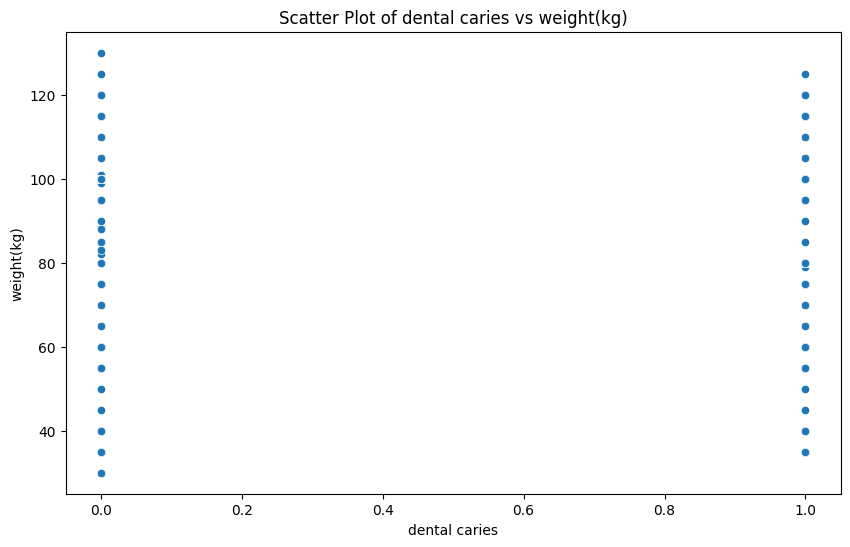

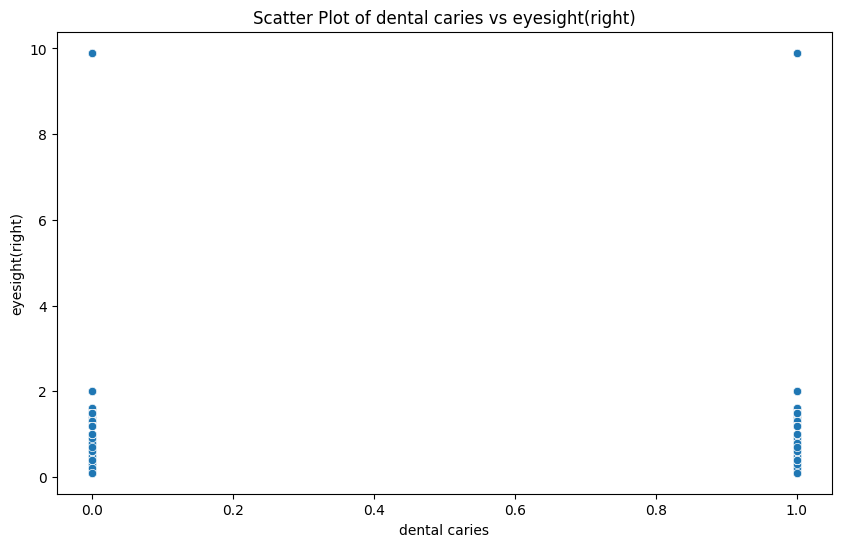

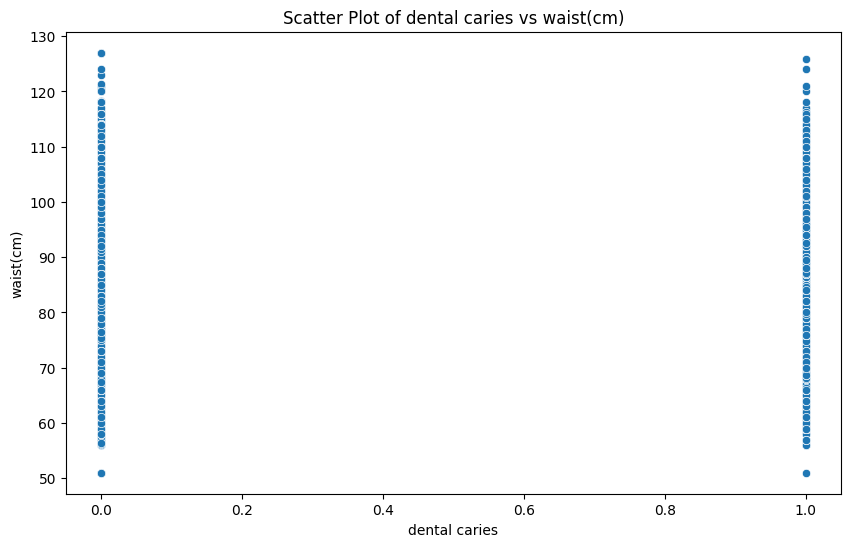

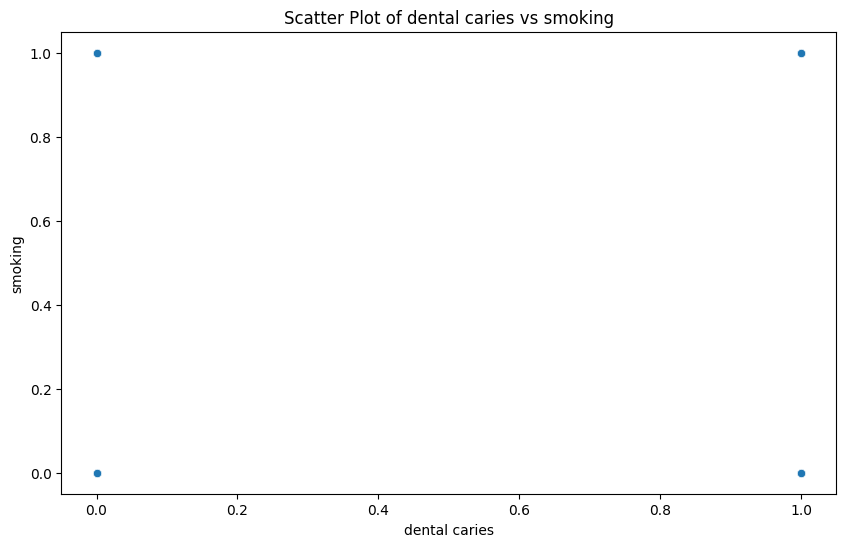

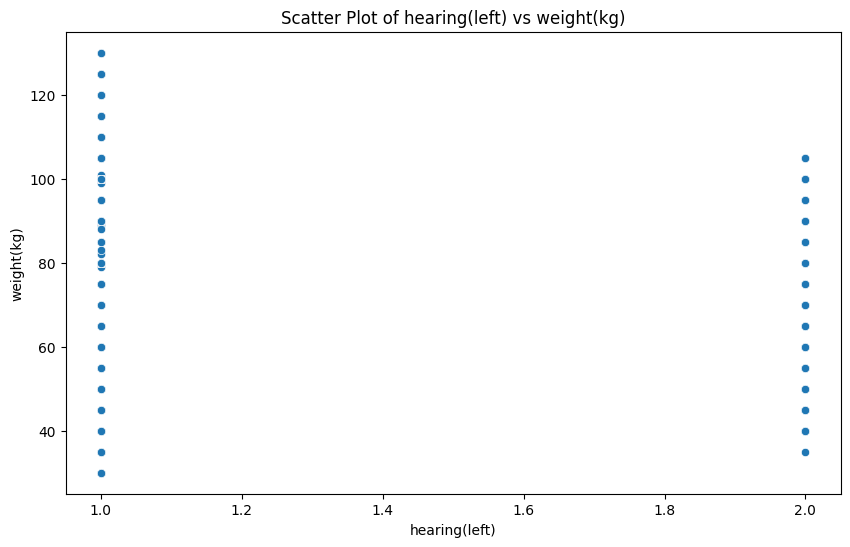

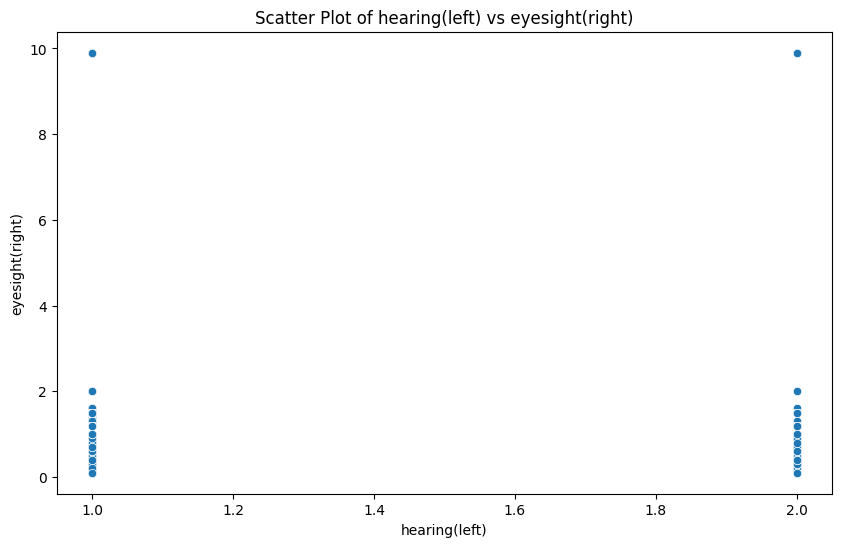

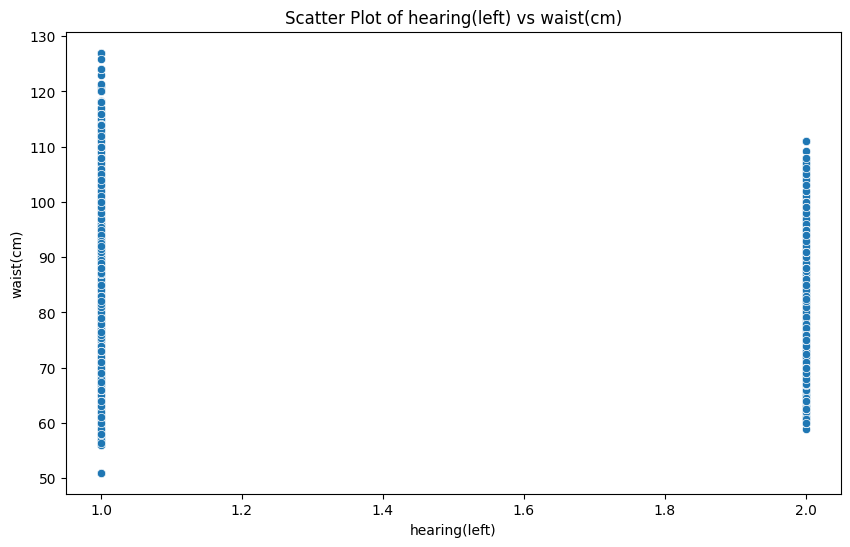

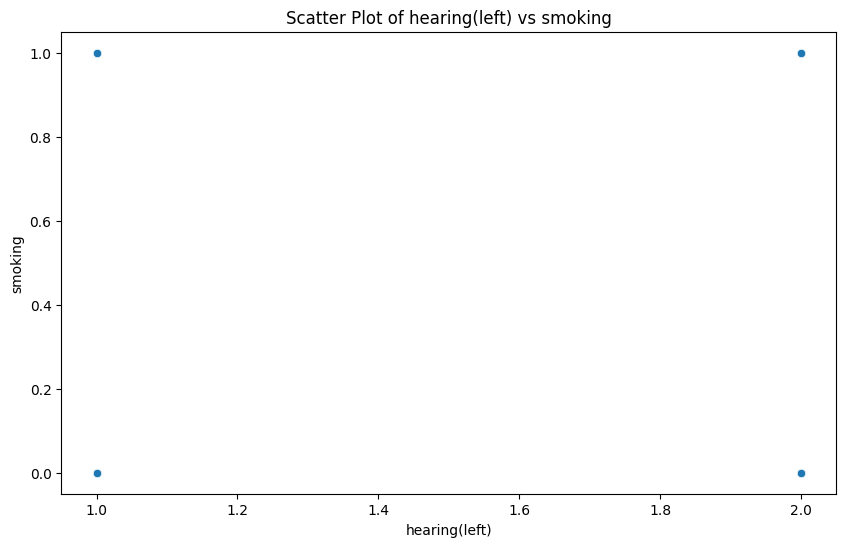

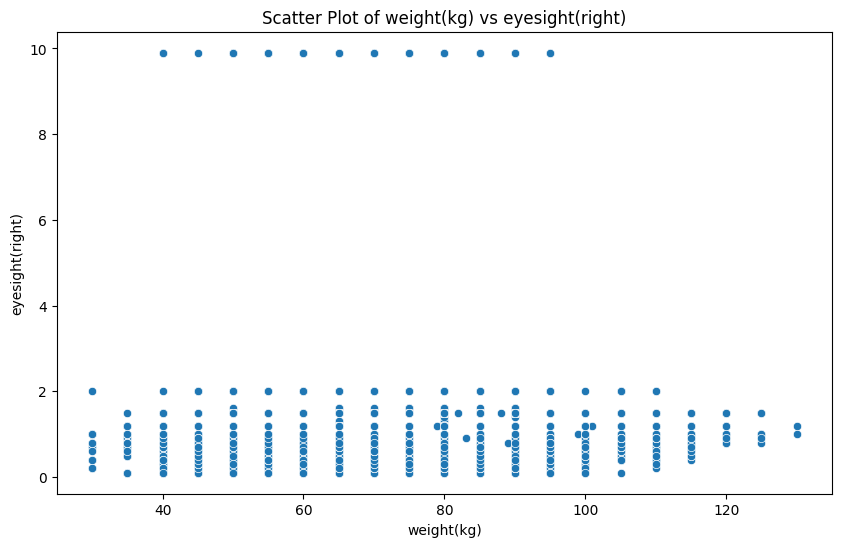

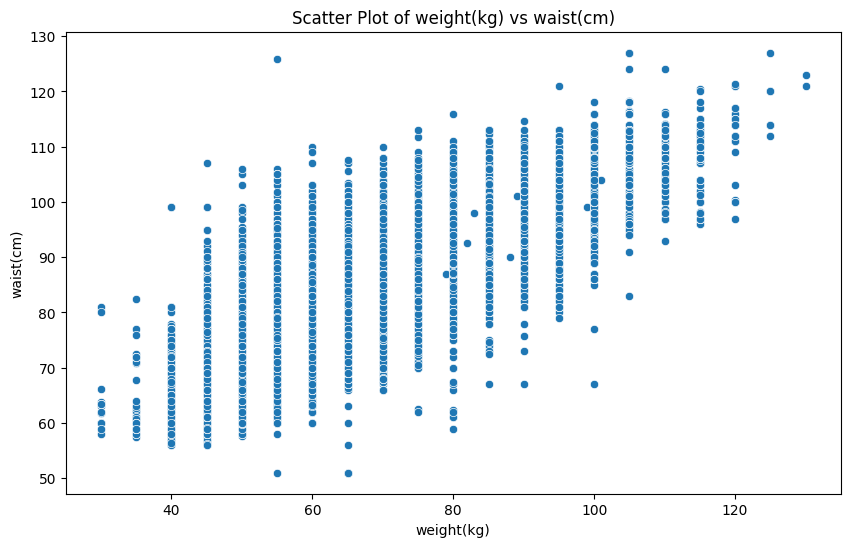

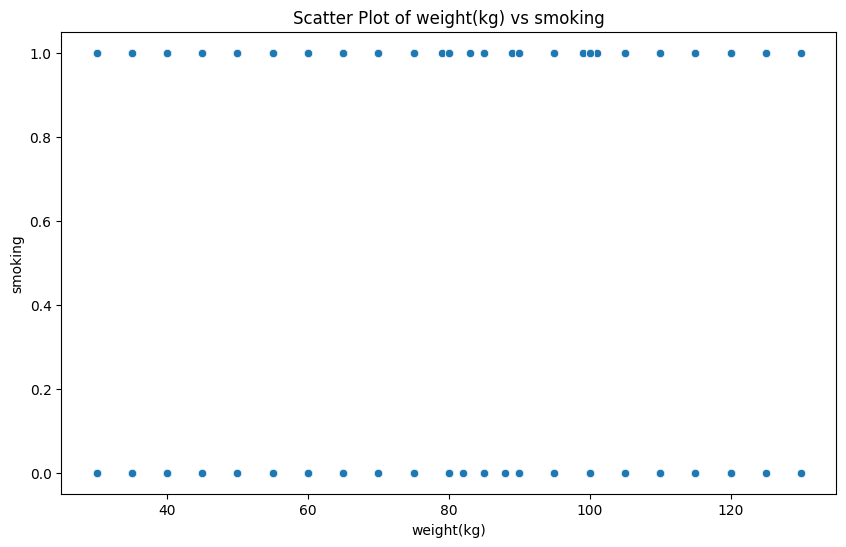

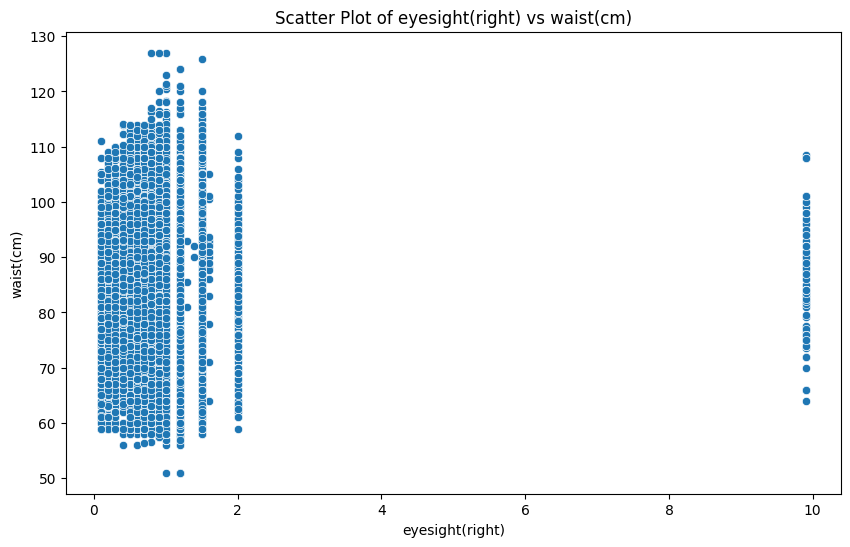

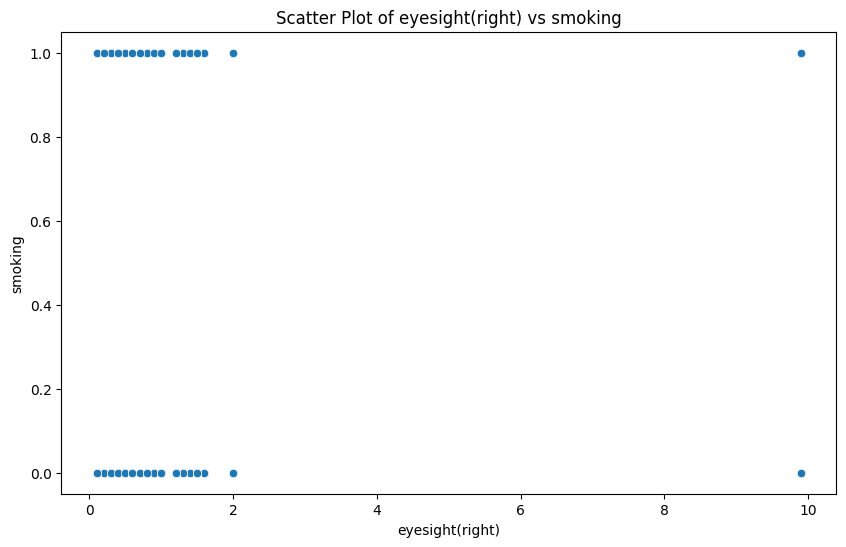

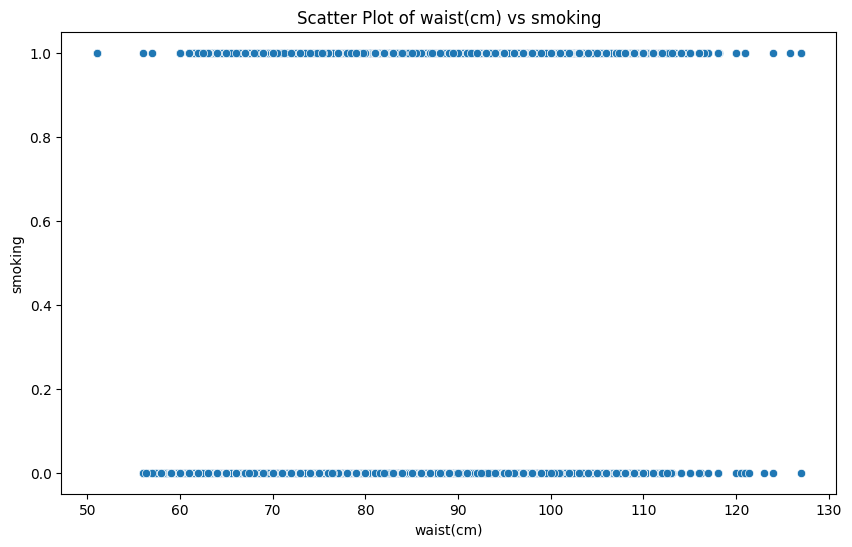

In [66]:
# Select numerical columns excluding 'id'
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'id']  # Exclude 'id'

# Create scatter plots for each pair of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))  # Create a new figure for each scatter plot
        sns.scatterplot(x=data[numerical_columns[i]], y=data[numerical_columns[j]])
        plt.title(f'Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()  # Display the plot

In [44]:
avg_weight = data['weight(kg)'].mean()
avg_weight

67.14366177726428

In [45]:
data['New_weight'] = data['weight(kg)'] > avg_weight

In [46]:
result = data.groupby('smoking')['New_weight'].value_counts()
result

smoking  New_weight
0        False         59306
         True          30297
1        True          45375
         False         24278
Name: count, dtype: int64

people who are less than average weight don't smoke (double people who are above and don't)
people who are more than average weight smoke (double the people who are below and smoke)

In [50]:
corr = data[['smoking','New_weight']].corr()
corr

smoking  New_weight
smoking     1.000000    0.311235
New_weight  0.311235    1.000000

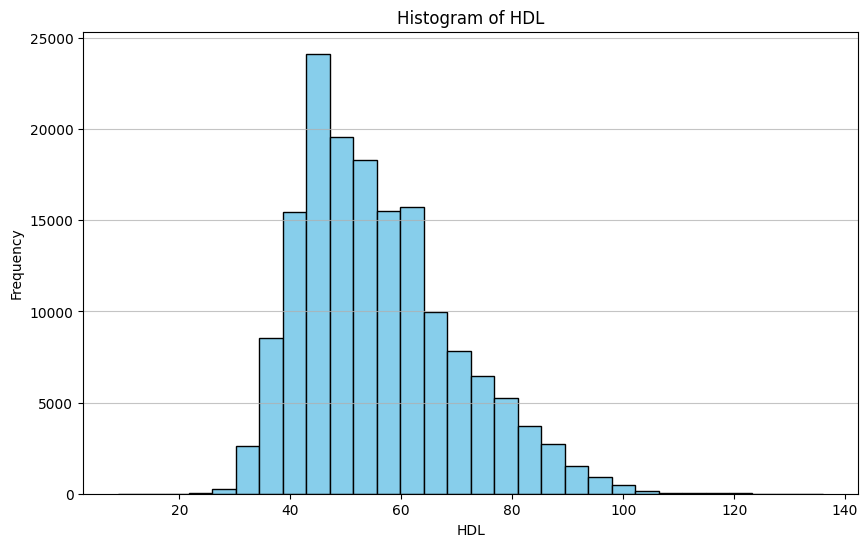

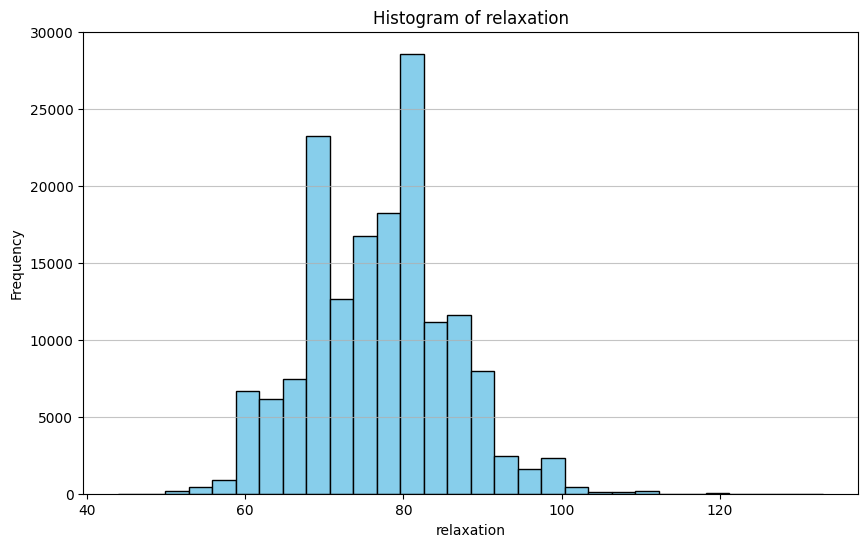

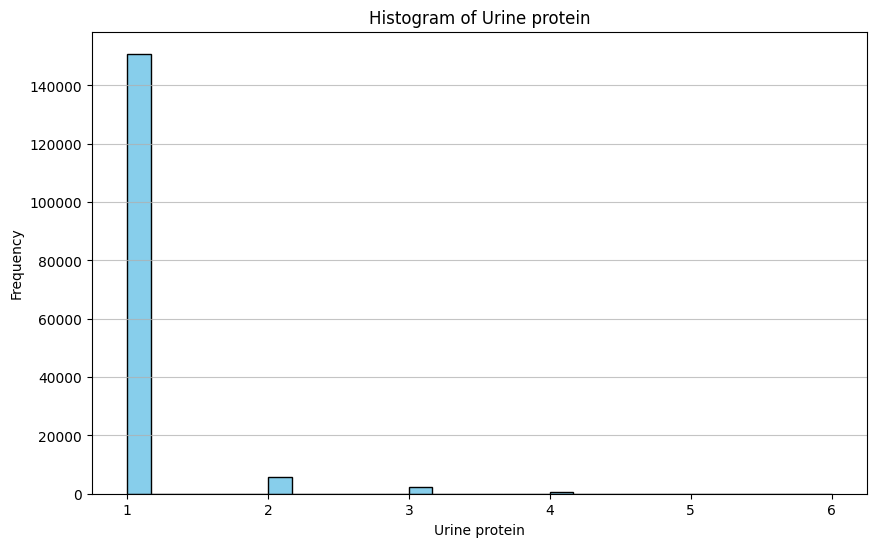

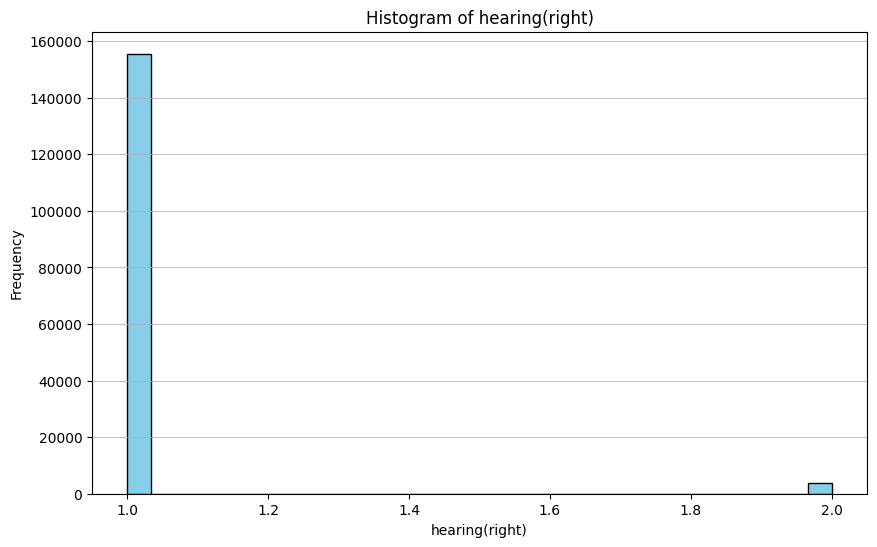

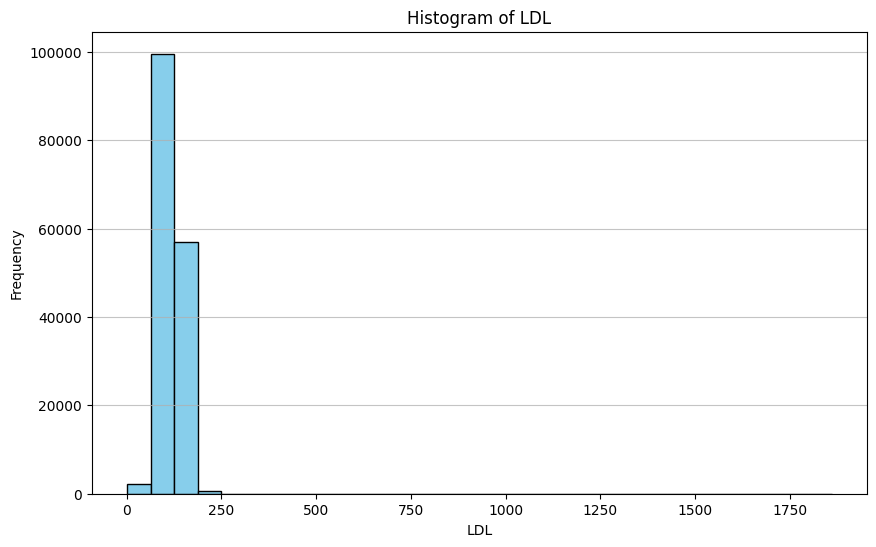

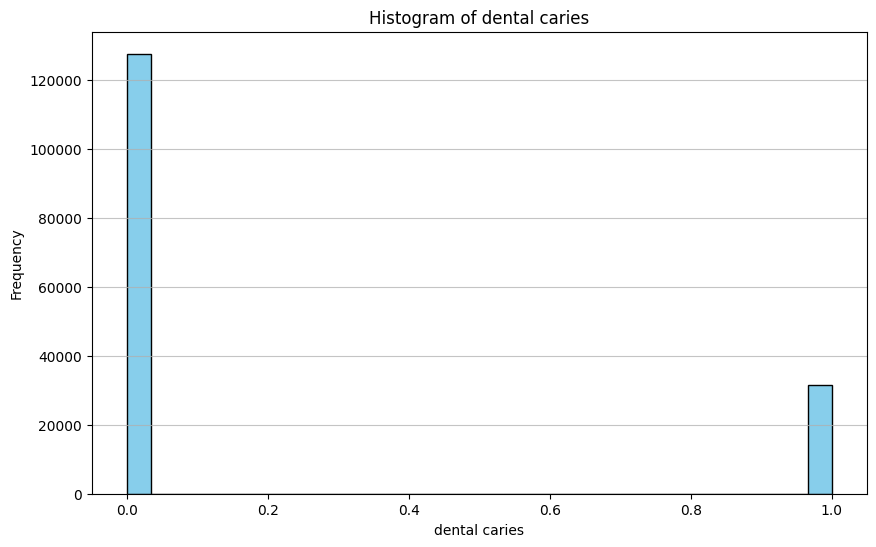

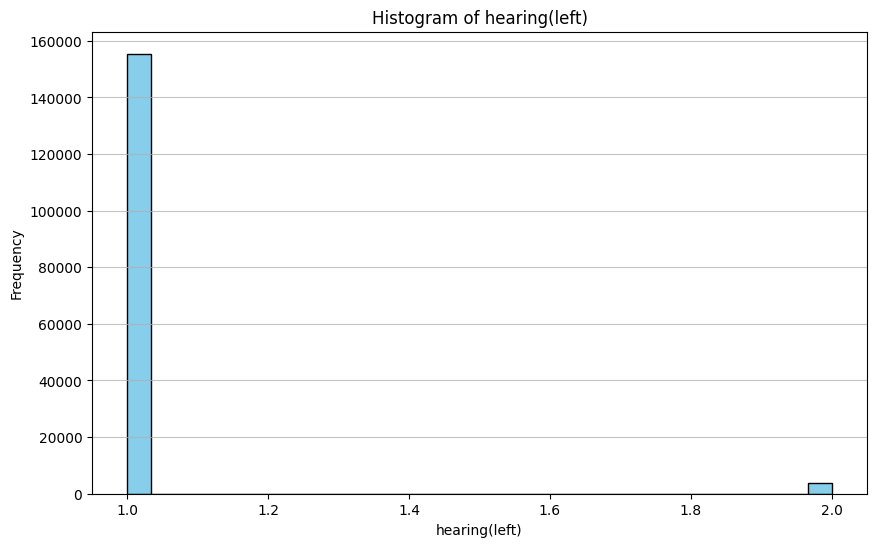

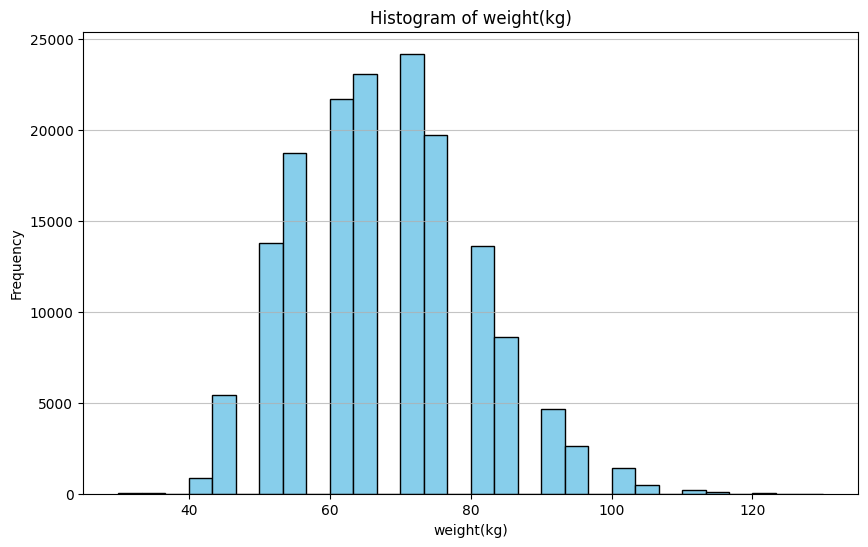

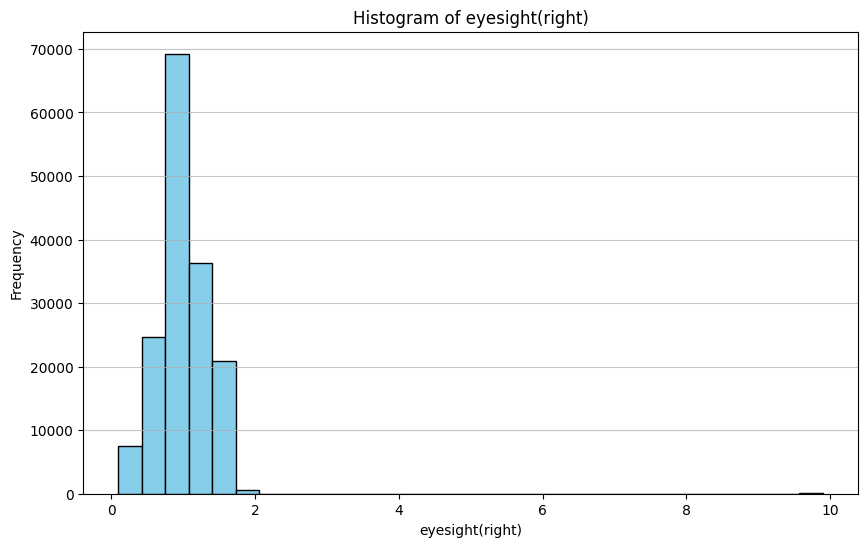

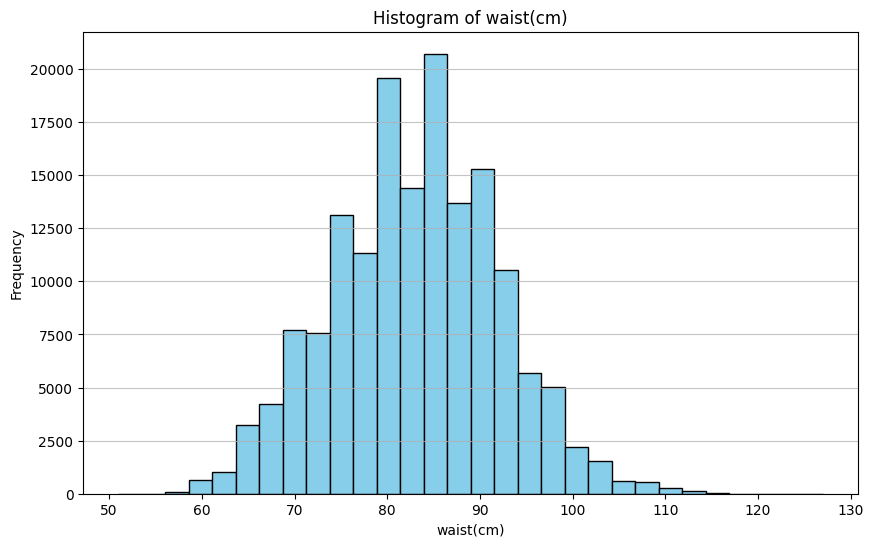

In [54]:
def plot_histograms():
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = numerical_columns[numerical_columns != 'id']  
    numerical_columns = numerical_columns[numerical_columns != 'smoking']  
    
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')  
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)  
        plt.show()

plot_histograms()

In [56]:
columns_to_analyze = data.columns[data.columns != 'id']
for column in columns_to_analyze:
    summary_stats = data[column].describe()
    print(summary_stats)

count    159256.000000
mean         55.852684
std          13.964141
min           9.000000
25%          45.000000
50%          54.000000
75%          64.000000
max         136.000000
Name: HDL, dtype: float64
count    159256.000000
mean         76.874071
std           8.994642
min          44.000000
25%          70.000000
50%          78.000000
75%          82.000000
max         133.000000
Name: relaxation, dtype: float64
count    159256.000000
mean          1.074233
std           0.347856
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: Urine protein, dtype: float64
count    159256.000000
mean          1.023421
std           0.151238
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hearing(right), dtype: float64
count    159256.000000
mean        114.607682
std          28.158931
min           1.000000
25%          95.000000
50%         114.0

<Figure size 1000x1000 with 0 Axes>

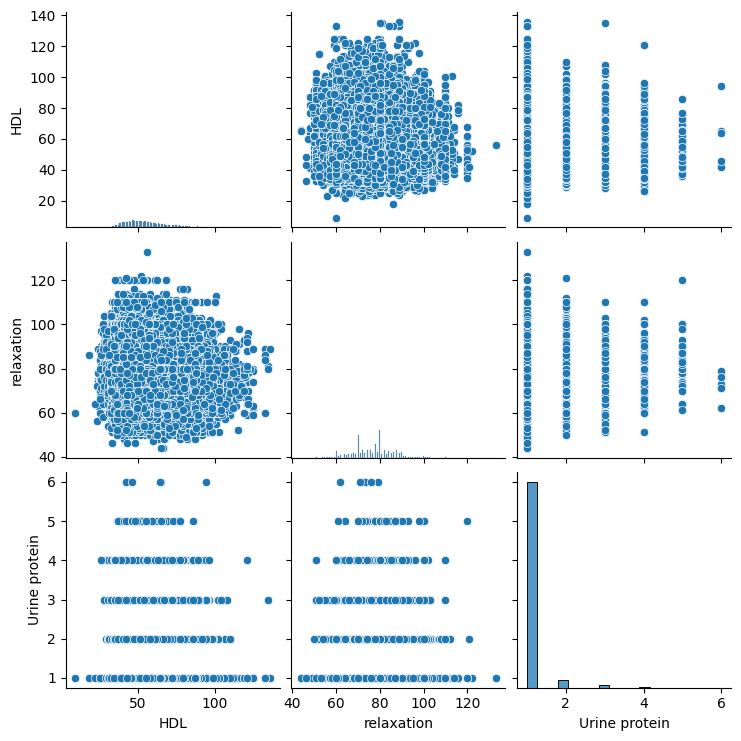

<Figure size 1000x1000 with 0 Axes>

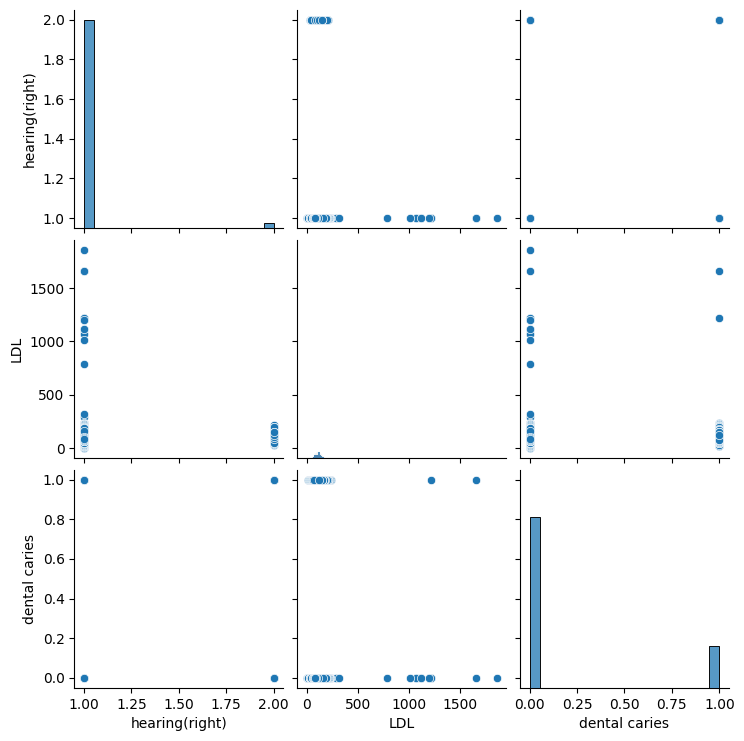

<Figure size 1000x1000 with 0 Axes>

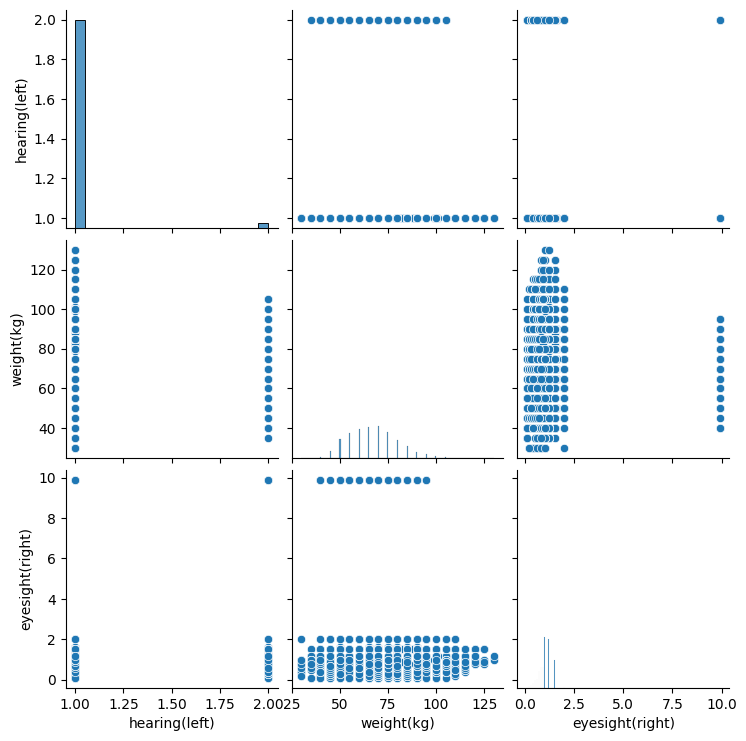

<Figure size 1000x1000 with 0 Axes>

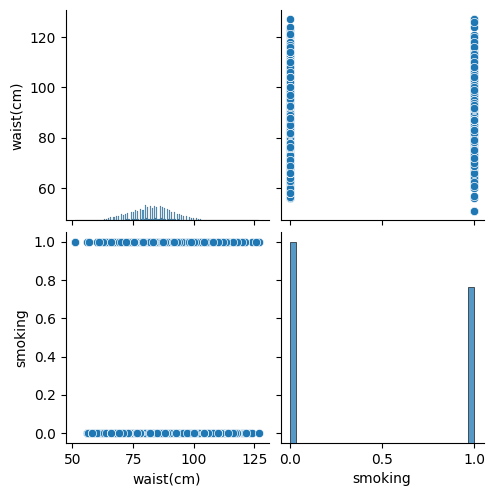

In [69]:
num_features_per_plot = 3 

for i in range(0, len(numerical_columns), num_features_per_plot):
    subset_features = numerical_columns[i:i + num_features_per_plot]
    if len(subset_features) > 1: 
        plt.figure(figsize=(10, 10))
        sns.pairplot(data[subset_features])
        plt.show()

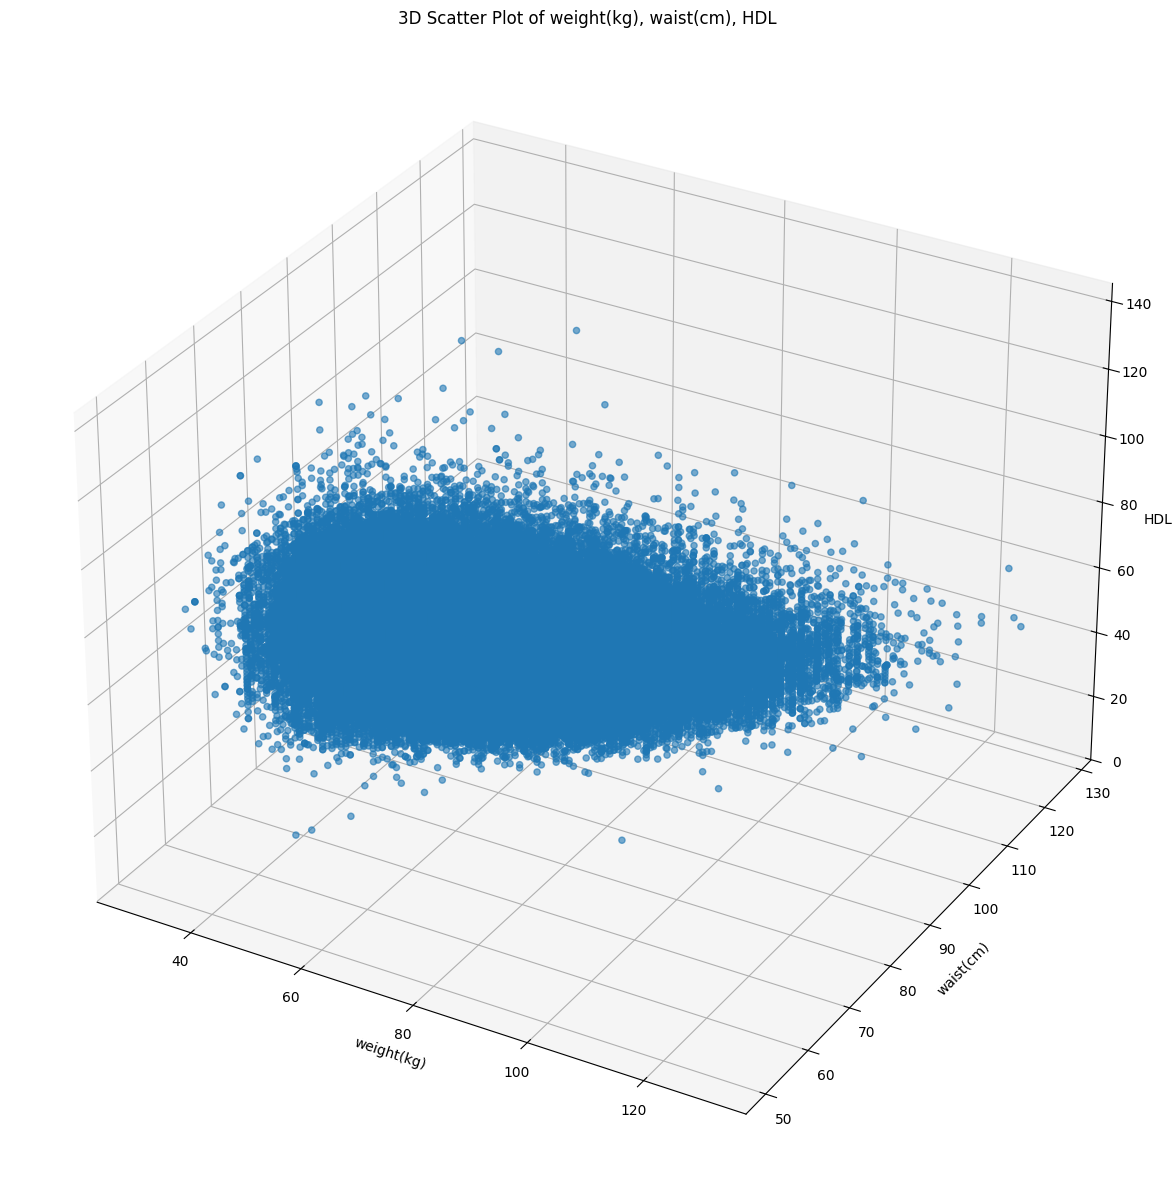

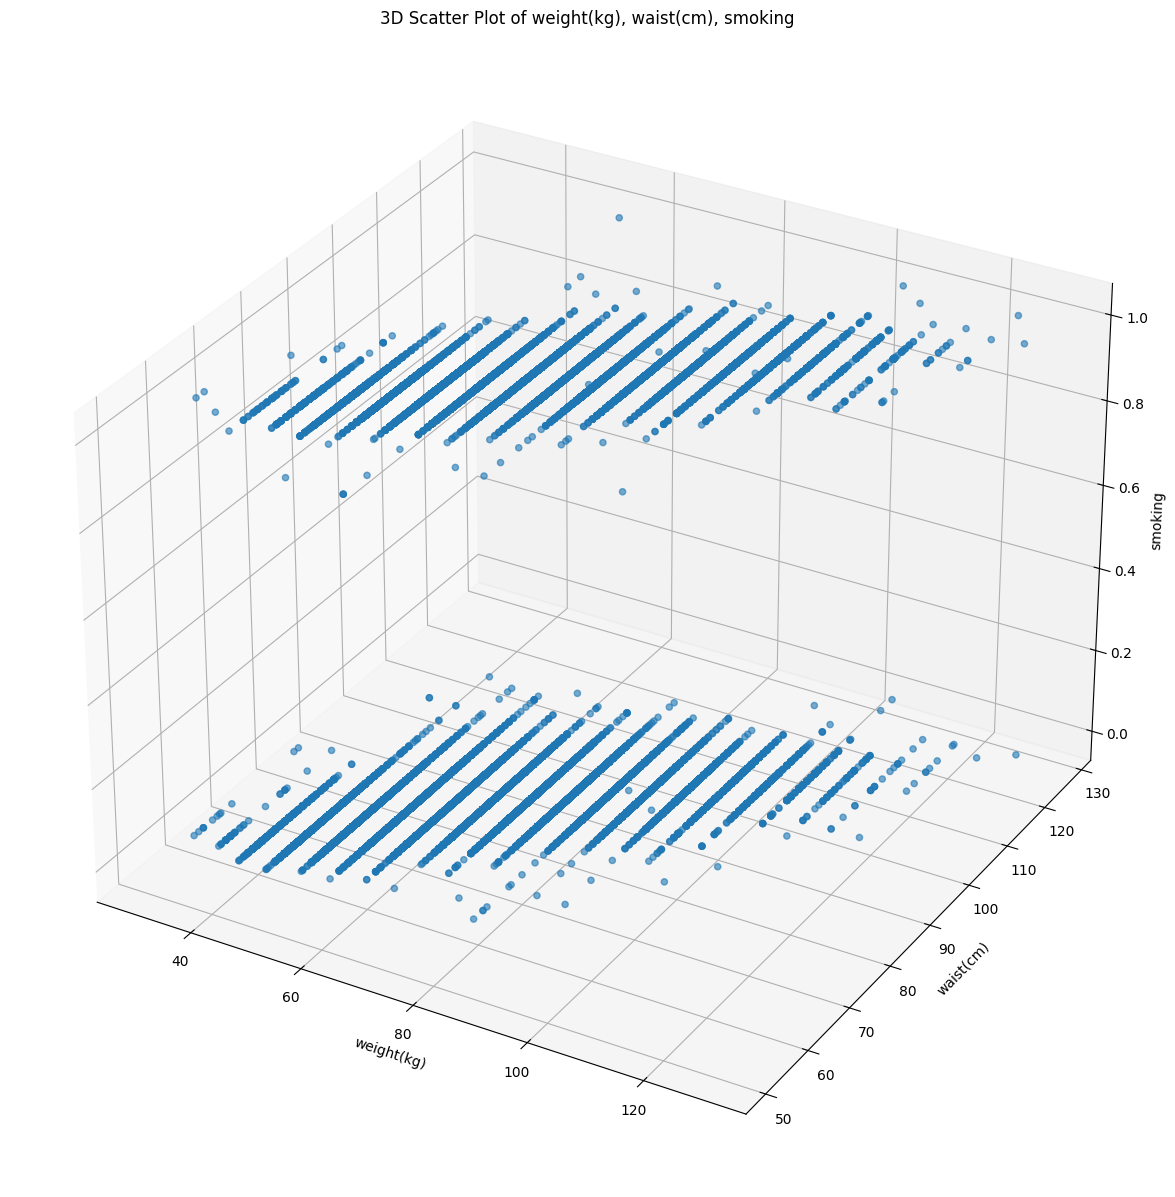

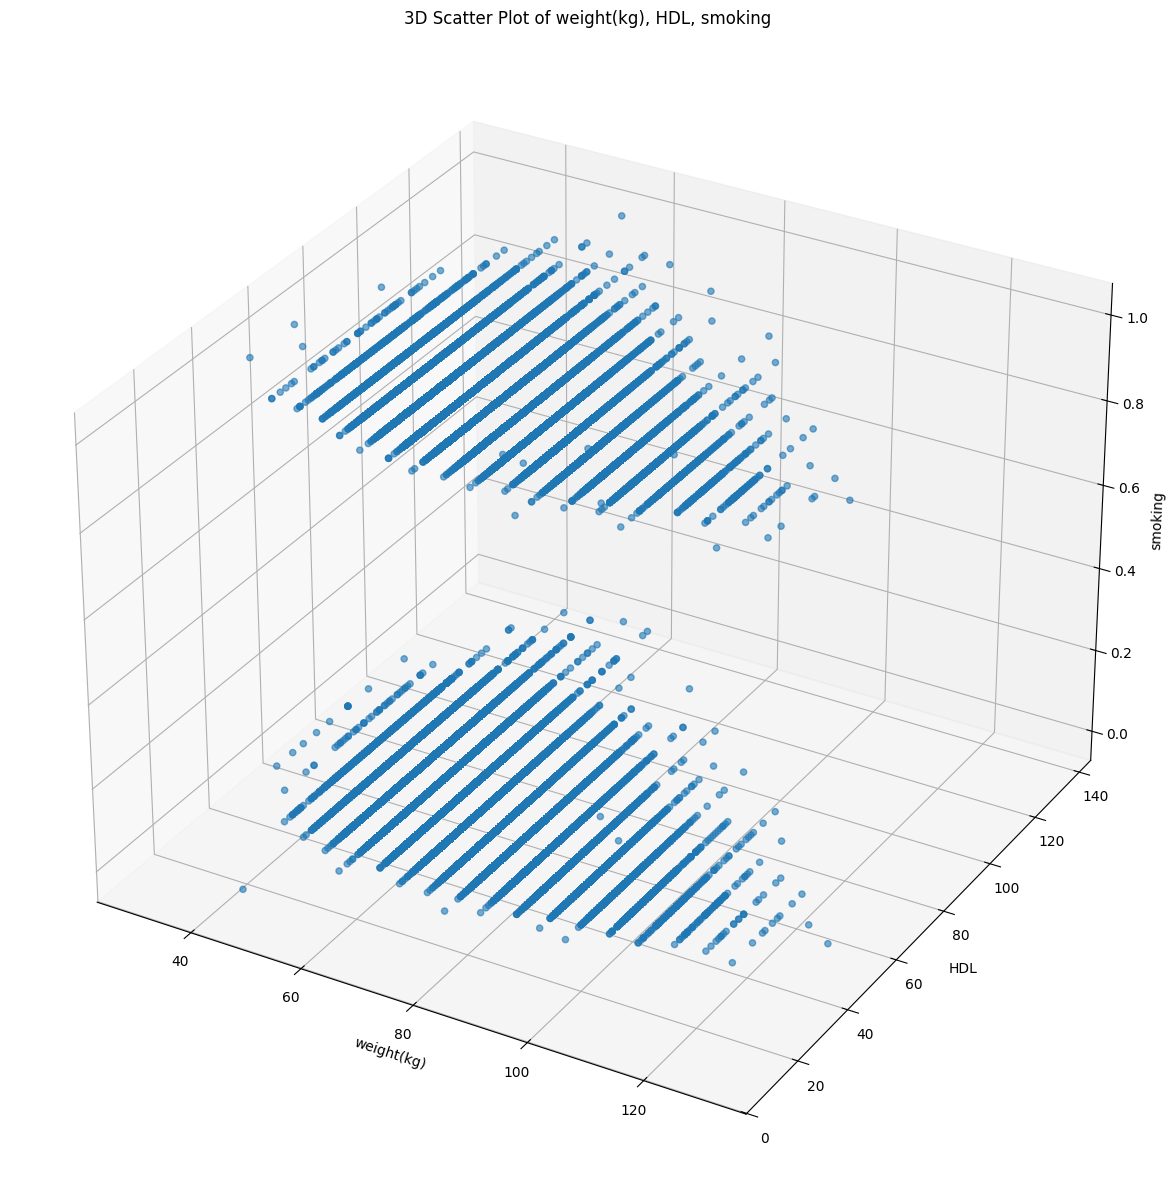

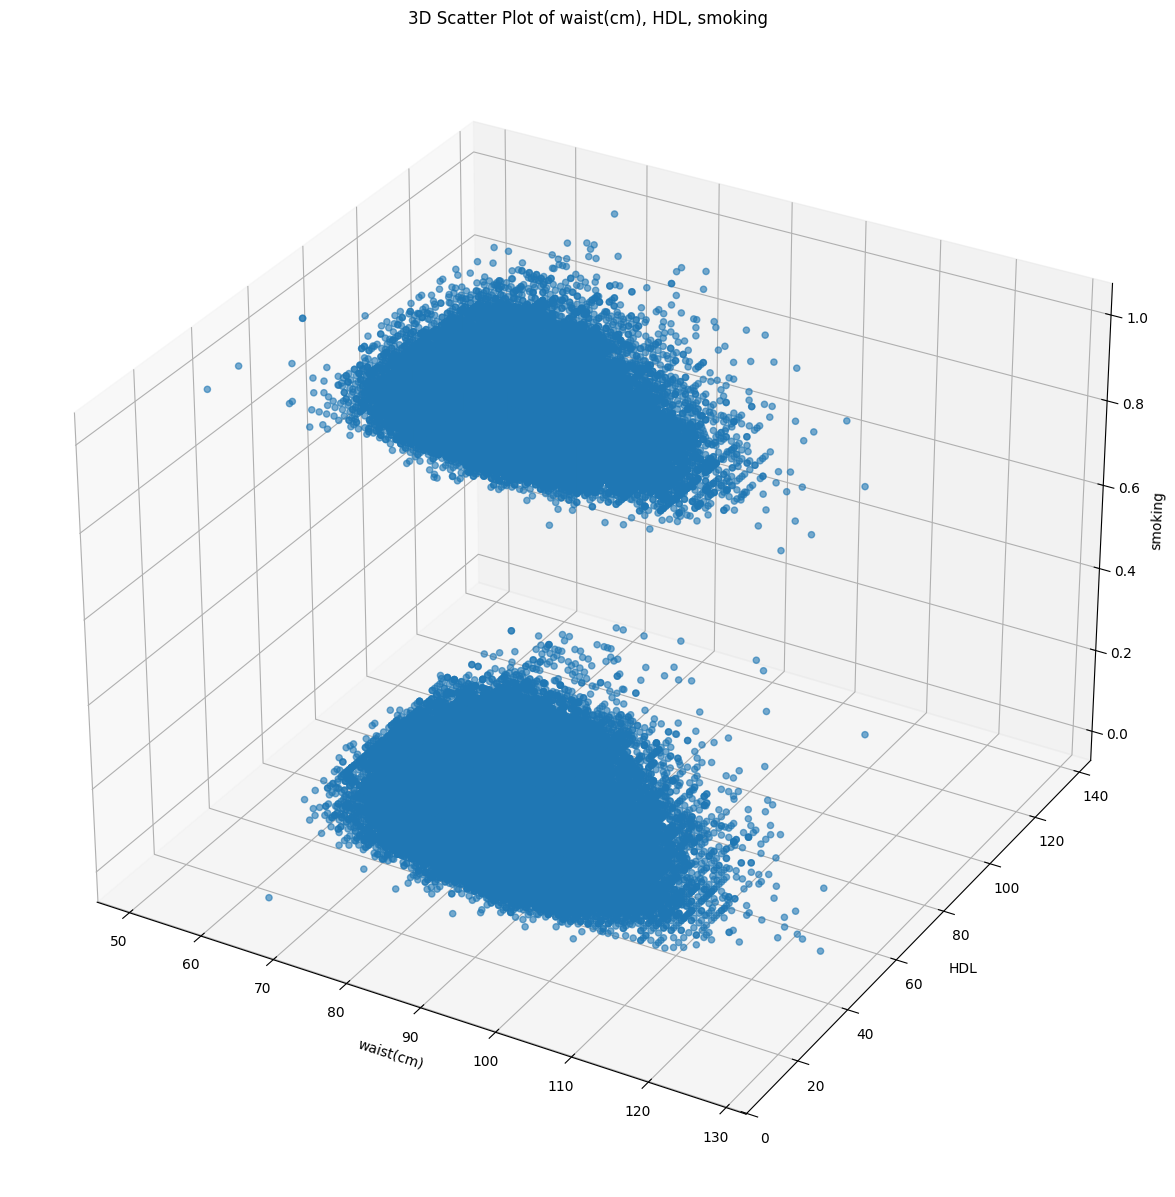

In [76]:
from itertools import combinations

selected_columns = ['weight(kg)', 'waist(cm)', 'HDL', 'smoking']

for combo in combinations(selected_columns, 3):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create the 3D scatter plot
    ax.scatter(data[combo[0]], data[combo[1]], data[combo[2]], alpha=0.6)
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])
    ax.set_title(f'3D Scatter Plot of {combo[0]}, {combo[1]}, {combo[2]}')
    
    plt.show() 

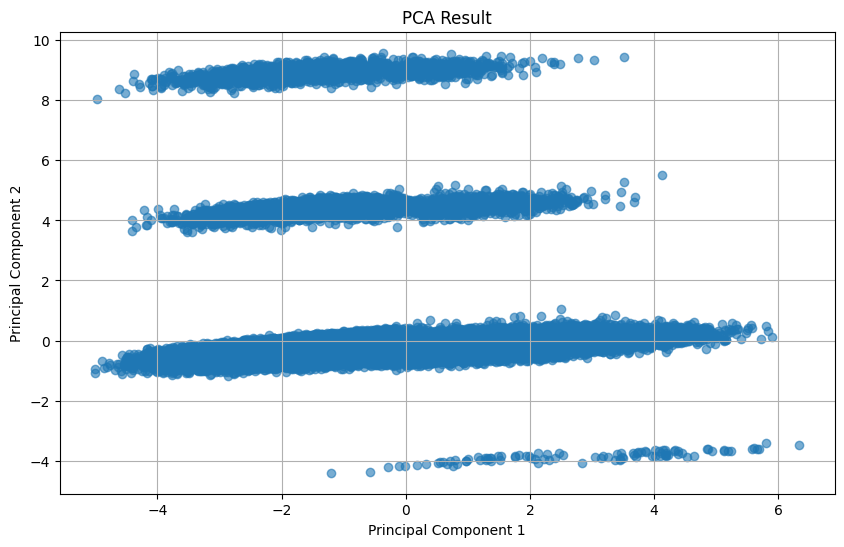

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numerical_columns = data.columns
numerical_columns = numerical_columns[numerical_columns != 'id']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])


plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()